<a href="https://colab.research.google.com/github/DATA601-CustSegment-Nov2025-to-Feb2026/New-CustSegment-Project/blob/main/Customer_Segmentation_(Preprocessing).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries & Load Datasets

In [134]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib, os
from functools import reduce
from sklearn.preprocessing import PowerTransformer, StandardScaler, RobustScaler

from google.colab import drive

In [135]:
# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [136]:
# Paths to the final merged dataset stored in Google Drive
final_merged_path = '/content/drive/MyDrive/0. Colab Notebooks (DATA 60X Project)/2. Preprocessed Datasets/customer_segmentation_after_merging.csv'

# Read the dataset from its CSV file
final_merged_df = pd.read_csv(final_merged_path, low_memory=False)

# Keep a copy to preserve the original data for reference later
final_merged_df_copy = final_merged_df.copy()

# Overview of the Dataset

In [137]:
# Show all columns
pd.set_option('display.max_columns', None)

# Display first 5 rows of the dataset
final_merged_df.head(5)

,household_key,basket_id,day,product_id,quantity,sales_value,store_id,retail_disc,trans_time,week_no,coupon_disc,coupon_match_disc,description,campaign,start_day,end_day,received_campaign,age_desc,marital_status_code,income_desc,homeowner_desc,hh_comp_desc,household_size_desc,kid_category_desc,manufacturer,department,brand,commodity_desc,sub_commodity_desc,curr_size_of_product,display,mailer,coupon_upc
0,979,40765361731,606,5978656,0,0.00,364,0.0,1621,87,-21.49,0.0,TypeA,18.0,587.0,642.0,yes,35-44,B,35-49K,Homeowner,1 Adult Kids,2,1,1,,National,,,,NaN,NaN,NaN
1,1463,30822740847,256,864900,1,19.99,372,0.0,2006,37,-19.99,0.0,TypeA,26.0,224.0,264.0,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,764,GROCERY,National,HOUSEHOLD CLEANG NEEDS,TOOLS - FLOOR & FURNITURE,1 KIT,NaN,NaN,NaN
2,1463,27609884211,53,5978656,0,0.00,372,0.0,1908,8,-16.99,0.0,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,,National,,,,NaN,NaN,NaN
3,1228,31883657167,328,900379,2,24.38,406,-1.6,1438,48,-16.98,0.0,TypeA,30.0,323.0,369.0,yes,45-54,U,100-124K,Unknown,Single Female,1,None/Unknown,69,SEAFOOD-PCKGD,Private,SEAFOOD - FROZEN,SEAFOOD-FRZ-IQF RAW SHRIMP RW,16 OZ,0,A,NaN
4,17,28179613679,100,997415,4,103.32,361,0.0,1741,15,-16.00,0.0,NaN,NaN,NaN,NaN,no,65+,B,Under 15K,Homeowner,2 Adults No Kids,2,None/Unknown,539,DRUG GM,National,CIGARETTES,CIGARETTES,500843 CTN,NaN,NaN,NaN


In [138]:
# Calculate the number of rows and columns in 'final_merged_df'
num_rows_final_merged_df,num_cols_final_merged_df = final_merged_df.shape

print("Number of rows in final_merged_df:", num_rows_final_merged_df)
print("Number of columns in final_merged_df:", num_cols_final_merged_df)

Number of rows in final_merged_df: 2595732
Number of columns in final_merged_df: 33


In [139]:
# Display the data type of each column in the 'final_merged_df'
print(final_merged_df.dtypes)

household_key             int64
basket_id                 int64
day                       int64
product_id                int64
quantity                  int64
sales_value             float64
store_id                  int64
retail_disc             float64
trans_time                int64
week_no                   int64
coupon_disc             float64
coupon_match_disc       float64
description              object
campaign                float64
start_day               float64
end_day                 float64
received_campaign        object
age_desc                 object
marital_status_code      object
income_desc              object
homeowner_desc           object
hh_comp_desc             object
household_size_desc      object
kid_category_desc        object
manufacturer              int64
department               object
brand                    object
commodity_desc           object
sub_commodity_desc       object
curr_size_of_product     object
display                  object
mailer  

In [140]:
# Show the number of duplicate rows
num_duplicates_final_merged_df = final_merged_df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates_final_merged_df}")

Number of duplicate rows: 0


In [141]:
# Count missing values in each column of the 'final_merged_df'
missing_counts_final_merged_df = final_merged_df.isna().sum()
print(missing_counts_final_merged_df)

household_key                 0
basket_id                     0
day                           0
product_id                    0
quantity                      0
sales_value                   0
store_id                      0
retail_disc                   0
trans_time                    0
week_no                       0
coupon_disc                   0
coupon_match_disc             0
description             1828306
campaign                1828306
start_day               1828306
end_day                 1828306
received_campaign             0
age_desc                1168429
marital_status_code     1168429
income_desc             1168429
homeowner_desc          1168429
hh_comp_desc            1168429
household_size_desc     1168429
kid_category_desc       1168429
manufacturer                  0
department                    0
brand                         0
commodity_desc                0
sub_commodity_desc            0
curr_size_of_product          0
display                 2031958
mailer  

In [142]:
# Count number of 'yes' and 'no' in 'received_campaign'
received_campaign_counts = final_merged_df['received_campaign'].value_counts()
print(received_campaign_counts)

received_campaign
no     1828306
yes     767426
Name: count, dtype: int64


# Create Variables, Drop Non-Important Variables and Handle Missing Values

## Create Time-Of-Day and Cyclical Encoding Variables

In [143]:
# Convert 'trans_time' column to string and pad with zeros to ensure 4 digits
final_merged_df['trans_time'] = final_merged_df['trans_time'].astype(str).str.zfill(4)

# Convert 'trans_time' column in HHMM format
final_merged_df['trans_time_dt'] = pd.to_datetime(final_merged_df['trans_time'], format='%H%M')

# Convert 'trans_time_dt' to total minutes for cyclical encoding
final_merged_df['minutes'] = (
    final_merged_df['trans_time_dt'].dt.hour * 60 +
    final_merged_df['trans_time_dt'].dt.minute
)

# Cyclical encoding
final_merged_df['trans_time_sin'] = np.sin(2 * np.pi * final_merged_df['minutes'] / 1440)
final_merged_df['trans_time_cos'] = np.cos(2 * np.pi * final_merged_df['minutes'] / 1440)

# Convert to time only
final_merged_df['trans_time_dt'] = final_merged_df['trans_time_dt'].dt.time

In [144]:
# Count abnormal values for sine and cosine transformation of transaction time.
abnormal_trans_time_sin = ((final_merged_df['trans_time_sin'] < -1) | (final_merged_df['trans_time_sin'] > 1)).sum()
abnormal_trans_time_cos = ((final_merged_df['trans_time_cos'] < -1) | (final_merged_df['trans_time_cos'] > 1)).sum()

# Print the results
print(f"Number of abnormal values in trans_time_sin: {abnormal_trans_time_sin}")
print(f"Number of abnormal values in trans_time_cos: {abnormal_trans_time_cos}")

Number of abnormal values in trans_time_sin: 0
Number of abnormal values in trans_time_cos: 0


In [145]:
# Create a function to categorize time-of-day category based on hour
def categorize_time_of_day(dt):
    hour = dt.hour
    if 0 <= hour < 6:
        return 'midnight'
    elif 6 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 17:
        return 'afternoon'
    elif 17 <= hour < 21:
        return 'evening'
    else:  # 21 <= hour <= 23
        return 'night'

# Apply function to create new column: 'trans_time_dt'
final_merged_df['trans_time_day'] = final_merged_df['trans_time_dt'].apply(categorize_time_of_day)

In [146]:
# Calculate the number of rows and columns in 'final_merged_df'
num_rows_final_merged_df,num_cols_final_merged_df = final_merged_df.shape

print("Number of rows in final_merged_df:", num_rows_final_merged_df)
print("Number of columns in final_merged_df:", num_cols_final_merged_df)

Number of rows in final_merged_df: 2595732
Number of columns in final_merged_df: 38


In [147]:
# Display first 5 rows of the dataset after adding new variables:
# trans_time_dt, minutes, trans_time_sin, trans_time_cos and trans_time_day
final_merged_df.head(5)

,household_key,basket_id,day,product_id,quantity,sales_value,store_id,retail_disc,trans_time,week_no,coupon_disc,coupon_match_disc,description,campaign,start_day,end_day,received_campaign,age_desc,marital_status_code,income_desc,homeowner_desc,hh_comp_desc,household_size_desc,kid_category_desc,manufacturer,department,brand,commodity_desc,sub_commodity_desc,curr_size_of_product,display,mailer,coupon_upc,trans_time_dt,minutes,trans_time_sin,trans_time_cos,trans_time_day
0,979,40765361731,606,5978656,0,0.00,364,0.0,1621,87,-21.49,0.0,TypeA,18.0,587.0,642.0,yes,35-44,B,35-49K,Homeowner,1 Adult Kids,2,1,1,,National,,,,NaN,NaN,NaN,16:21:00,981,-0.908143,-0.418660,afternoon
1,1463,30822740847,256,864900,1,19.99,372,0.0,2006,37,-19.99,0.0,TypeA,26.0,224.0,264.0,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,764,GROCERY,National,HOUSEHOLD CLEANG NEEDS,TOOLS - FLOOR & FURNITURE,1 KIT,NaN,NaN,NaN,20:06:00,1206,-0.852640,0.522499,evening
2,1463,27609884211,53,5978656,0,0.00,372,0.0,1908,8,-16.99,0.0,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,,National,,,,NaN,NaN,NaN,19:08:00,1148,-0.956305,0.292372,evening
3,1228,31883657167,328,900379,2,24.38,406,-1.6,1438,48,-16.98,0.0,TypeA,30.0,323.0,369.0,yes,45-54,U,100-124K,Unknown,Single Female,1,None/Unknown,69,SEAFOOD-PCKGD,Private,SEAFOOD - FROZEN,SEAFOOD-FRZ-IQF RAW SHRIMP RW,16 OZ,0,A,NaN,14:38:00,878,-0.636078,-0.771625,afternoon
4,17,28179613679,100,997415,4,103.32,361,0.0,1741,15,-16.00,0.0,NaN,NaN,NaN,NaN,no,65+,B,Under 15K,Homeowner,2 Adults No Kids,2,None/Unknown,539,DRUG GM,National,CIGARETTES,CIGARETTES,500843 CTN,NaN,NaN,NaN,17:41:00,1061,-0.996566,-0.082808,evening


## Drop Non-Important Time-Related Variables

In [148]:
# Drop non-important variables related to time
final_merged_df = final_merged_df.drop(columns=['trans_time', 'minutes'])

In [149]:
# Display first 5 rows of the dataset after dropping variables:
# trans_time and minutes
final_merged_df.head(5)

,household_key,basket_id,day,product_id,quantity,sales_value,store_id,retail_disc,week_no,coupon_disc,coupon_match_disc,description,campaign,start_day,end_day,received_campaign,age_desc,marital_status_code,income_desc,homeowner_desc,hh_comp_desc,household_size_desc,kid_category_desc,manufacturer,department,brand,commodity_desc,sub_commodity_desc,curr_size_of_product,display,mailer,coupon_upc,trans_time_dt,trans_time_sin,trans_time_cos,trans_time_day
0,979,40765361731,606,5978656,0,0.00,364,0.0,87,-21.49,0.0,TypeA,18.0,587.0,642.0,yes,35-44,B,35-49K,Homeowner,1 Adult Kids,2,1,1,,National,,,,NaN,NaN,NaN,16:21:00,-0.908143,-0.418660,afternoon
1,1463,30822740847,256,864900,1,19.99,372,0.0,37,-19.99,0.0,TypeA,26.0,224.0,264.0,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,764,GROCERY,National,HOUSEHOLD CLEANG NEEDS,TOOLS - FLOOR & FURNITURE,1 KIT,NaN,NaN,NaN,20:06:00,-0.852640,0.522499,evening
2,1463,27609884211,53,5978656,0,0.00,372,0.0,8,-16.99,0.0,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,,National,,,,NaN,NaN,NaN,19:08:00,-0.956305,0.292372,evening
3,1228,31883657167,328,900379,2,24.38,406,-1.6,48,-16.98,0.0,TypeA,30.0,323.0,369.0,yes,45-54,U,100-124K,Unknown,Single Female,1,None/Unknown,69,SEAFOOD-PCKGD,Private,SEAFOOD - FROZEN,SEAFOOD-FRZ-IQF RAW SHRIMP RW,16 OZ,0,A,NaN,14:38:00,-0.636078,-0.771625,afternoon
4,17,28179613679,100,997415,4,103.32,361,0.0,15,-16.00,0.0,NaN,NaN,NaN,NaN,no,65+,B,Under 15K,Homeowner,2 Adults No Kids,2,None/Unknown,539,DRUG GM,National,CIGARETTES,CIGARETTES,500843 CTN,NaN,NaN,NaN,17:41:00,-0.996566,-0.082808,evening


## Create Used Retail Discount Variable

In [150]:
# Count missing values in each column of the 'final_merged_df'
missing_counts_final_merged_df = final_merged_df.isna().sum()
print(missing_counts_final_merged_df)

household_key                 0
basket_id                     0
day                           0
product_id                    0
quantity                      0
sales_value                   0
store_id                      0
retail_disc                   0
week_no                       0
coupon_disc                   0
coupon_match_disc             0
description             1828306
campaign                1828306
start_day               1828306
end_day                 1828306
received_campaign             0
age_desc                1168429
marital_status_code     1168429
income_desc             1168429
homeowner_desc          1168429
hh_comp_desc            1168429
household_size_desc     1168429
kid_category_desc       1168429
manufacturer                  0
department                    0
brand                         0
commodity_desc                0
sub_commodity_desc            0
curr_size_of_product          0
display                 2031958
mailer                  2031958
coupon_u

In [151]:
# Check the minimum and maximum values of 'retail_disc' variable
min_value_retail_disc = final_merged_df['retail_disc'].min()
max_value_retail_disc = final_merged_df['retail_disc'].max()

print("Minimum value of 'retail_disc' variable:", min_value_retail_disc)
print("Maximum value of of 'retail_disc' variable:", max_value_retail_disc)

Minimum value of 'retail_disc' variable: -180.0
Maximum value of of 'retail_disc' variable: 3.99


In [152]:
# Count transactions where 'retail_disc' variable is positive.
# Positive values in 'retail_disc' variable indicate an issue because discounts are recorded as negative values in this dataset.
num_positive_retail_disc = (final_merged_df['retail_disc'] > 0).sum()
print("Number of values greater than 0 in 'retail_disc' variable:", num_positive_retail_disc)

Number of values greater than 0 in 'retail_disc' variable: 36


In [153]:
# As there are only a very small number of positive values (36) in 'retail_disc' variable, it is likely due data entry.
# So, any value greater than 0 in 'retail_disc' variable is converted to 0.
final_merged_df.loc[final_merged_df['retail_disc'] > 0, 'retail_disc'] = 0

# Count transactions where 'retail_disc' variable is positive after converting to 0.
num_positive_retail_disc = (final_merged_df['retail_disc'] > 0).sum()
print("Number of values greater than 0 in 'retail_disc' variable:", num_positive_retail_disc)

Number of values greater than 0 in 'retail_disc' variable: 0


In [154]:
# Create a 'used_retail_discount' variable:
# If retail_disc < 0, household purchased items with retail discount ("Yes")
# If retail_disc = 0, household purchased items without retail discoun("No")
final_merged_df['used_retailed_discount'] = np.where(final_merged_df['retail_disc'] < 0, 'yes', 'no')

# Move 'used_retailed_discount' variable next to 'retail_disc'
all_columns = final_merged_df.columns.tolist()
all_columns.insert(all_columns.index('retail_disc') + 1, all_columns.pop(all_columns.index('used_retailed_discount')))
final_merged_df = final_merged_df[all_columns]


# Display first 5 rows of the dataset after creating variables:
# used_coupon
final_merged_df.head(5)

,household_key,basket_id,day,product_id,quantity,sales_value,store_id,retail_disc,used_retailed_discount,week_no,coupon_disc,coupon_match_disc,description,campaign,start_day,end_day,received_campaign,age_desc,marital_status_code,income_desc,homeowner_desc,hh_comp_desc,household_size_desc,kid_category_desc,manufacturer,department,brand,commodity_desc,sub_commodity_desc,curr_size_of_product,display,mailer,coupon_upc,trans_time_dt,trans_time_sin,trans_time_cos,trans_time_day
0,979,40765361731,606,5978656,0,0.00,364,0.0,no,87,-21.49,0.0,TypeA,18.0,587.0,642.0,yes,35-44,B,35-49K,Homeowner,1 Adult Kids,2,1,1,,National,,,,NaN,NaN,NaN,16:21:00,-0.908143,-0.418660,afternoon
1,1463,30822740847,256,864900,1,19.99,372,0.0,no,37,-19.99,0.0,TypeA,26.0,224.0,264.0,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,764,GROCERY,National,HOUSEHOLD CLEANG NEEDS,TOOLS - FLOOR & FURNITURE,1 KIT,NaN,NaN,NaN,20:06:00,-0.852640,0.522499,evening
2,1463,27609884211,53,5978656,0,0.00,372,0.0,no,8,-16.99,0.0,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,,National,,,,NaN,NaN,NaN,19:08:00,-0.956305,0.292372,evening
3,1228,31883657167,328,900379,2,24.38,406,-1.6,yes,48,-16.98,0.0,TypeA,30.0,323.0,369.0,yes,45-54,U,100-124K,Unknown,Single Female,1,None/Unknown,69,SEAFOOD-PCKGD,Private,SEAFOOD - FROZEN,SEAFOOD-FRZ-IQF RAW SHRIMP RW,16 OZ,0,A,NaN,14:38:00,-0.636078,-0.771625,afternoon
4,17,28179613679,100,997415,4,103.32,361,0.0,no,15,-16.00,0.0,NaN,NaN,NaN,NaN,no,65+,B,Under 15K,Homeowner,2 Adults No Kids,2,None/Unknown,539,DRUG GM,National,CIGARETTES,CIGARETTES,500843 CTN,NaN,NaN,NaN,17:41:00,-0.996566,-0.082808,evening


## Create Used Coupon Variable

In [155]:
# Count missing values in each column of the 'final_merged_df'
missing_counts_final_merged_df = final_merged_df.isna().sum()
print(missing_counts_final_merged_df)

household_key                   0
basket_id                       0
day                             0
product_id                      0
quantity                        0
sales_value                     0
store_id                        0
retail_disc                     0
used_retailed_discount          0
week_no                         0
coupon_disc                     0
coupon_match_disc               0
description               1828306
campaign                  1828306
start_day                 1828306
end_day                   1828306
received_campaign               0
age_desc                  1168429
marital_status_code       1168429
income_desc               1168429
homeowner_desc            1168429
hh_comp_desc              1168429
household_size_desc       1168429
kid_category_desc         1168429
manufacturer                    0
department                      0
brand                           0
commodity_desc                  0
sub_commodity_desc              0
curr_size_of_p

In [156]:
# Check the minimum and maximum values of 'coupon_disc' variable
min_value_coupon_disc = final_merged_df['coupon_disc'].min()
max_value_coupon_disc = final_merged_df['coupon_disc'].max()

print("Minimum value of 'coupon_disc' variable:", min_value_coupon_disc)
print("Maximum value of of 'coupon_disc' variable:", max_value_coupon_disc)

Minimum value of 'coupon_disc' variable: -55.93
Maximum value of of 'coupon_disc' variable: 0.0


In [157]:
# Create a 'used_coupon' variable:
# If coupon_disc < 0, household used a manufacturer coupon ("Yes")
# If coupon_disc = 0, household did not use a manufacturer coupon ("No")
final_merged_df['used_coupon'] = np.where(final_merged_df['coupon_disc'] < 0, 'yes', 'no')

# Move 'used_coupon' variable next to 'coupon_disc'
all_columns = final_merged_df.columns.tolist()
all_columns.insert(all_columns.index('coupon_disc') + 1, all_columns.pop(all_columns.index('used_coupon')))
final_merged_df = final_merged_df[all_columns]


# Display first 5 rows of the dataset after creating variables:
# used_coupon
final_merged_df.head(5)

,household_key,basket_id,day,product_id,quantity,sales_value,store_id,retail_disc,used_retailed_discount,week_no,coupon_disc,used_coupon,coupon_match_disc,description,campaign,start_day,end_day,received_campaign,age_desc,marital_status_code,income_desc,homeowner_desc,hh_comp_desc,household_size_desc,kid_category_desc,manufacturer,department,brand,commodity_desc,sub_commodity_desc,curr_size_of_product,display,mailer,coupon_upc,trans_time_dt,trans_time_sin,trans_time_cos,trans_time_day
0,979,40765361731,606,5978656,0,0.00,364,0.0,no,87,-21.49,yes,0.0,TypeA,18.0,587.0,642.0,yes,35-44,B,35-49K,Homeowner,1 Adult Kids,2,1,1,,National,,,,NaN,NaN,NaN,16:21:00,-0.908143,-0.418660,afternoon
1,1463,30822740847,256,864900,1,19.99,372,0.0,no,37,-19.99,yes,0.0,TypeA,26.0,224.0,264.0,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,764,GROCERY,National,HOUSEHOLD CLEANG NEEDS,TOOLS - FLOOR & FURNITURE,1 KIT,NaN,NaN,NaN,20:06:00,-0.852640,0.522499,evening
2,1463,27609884211,53,5978656,0,0.00,372,0.0,no,8,-16.99,yes,0.0,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,,National,,,,NaN,NaN,NaN,19:08:00,-0.956305,0.292372,evening
3,1228,31883657167,328,900379,2,24.38,406,-1.6,yes,48,-16.98,yes,0.0,TypeA,30.0,323.0,369.0,yes,45-54,U,100-124K,Unknown,Single Female,1,None/Unknown,69,SEAFOOD-PCKGD,Private,SEAFOOD - FROZEN,SEAFOOD-FRZ-IQF RAW SHRIMP RW,16 OZ,0,A,NaN,14:38:00,-0.636078,-0.771625,afternoon
4,17,28179613679,100,997415,4,103.32,361,0.0,no,15,-16.00,yes,0.0,NaN,NaN,NaN,NaN,no,65+,B,Under 15K,Homeowner,2 Adults No Kids,2,None/Unknown,539,DRUG GM,National,CIGARETTES,CIGARETTES,500843 CTN,NaN,NaN,NaN,17:41:00,-0.996566,-0.082808,evening


## Correct 'received_campaign' Logic Based On Coupon Usage

In [158]:
# Count number of 'yes' and 'no' in 'received_campaign'
received_campaign_counts = final_merged_df['received_campaign'].value_counts()
print(received_campaign_counts)

received_campaign
no     1828306
yes     767426
Name: count, dtype: int64


In [159]:
# 'received_campaign' variable was created to indicate if 'day' in transaction dataset falls within the campaign period (Yes or No)
# Currently, we have:
# 1. 767426 transactions: yes, received campaign. (transaction days fall within the household's campaign period)
# 2. 1828306 transactions: no, did not receive campaign. (transaction days do not fall within the household's campaign period)

# When exploring the dataset, we noticed 4 situations:
# Situation 1: 'campaign' variable has a value and 'used_coupon' = yes → received campaign and used coupon (logical).
# Situation 2: 'campaign' variable has a value and 'used_coupon' = no → received campaign but did not use coupon (logical).
# Situation 3: 'campaign' variable is missing and 'used_coupon' = no → did not receive campaign and did not use coupon (logical).
# Situation 4: 'campaign' variable is missing and 'used_coupon' = yes → did not receive coupon, but used coupon (not logical, indicates missing data).

situation4_missing_data_count = final_merged_df.loc[
    (final_merged_df['campaign'].isna()) &
    (final_merged_df['used_coupon'] == 'yes') &
    (final_merged_df['received_campaign'] == 'no')
].shape[0]

print("Number of missing data in Situation 4:", situation4_missing_data_count)

Number of missing data in Situation 4: 22762


In [160]:
# Therefore, when the 'campaign' variable is missing, 'used_coupon' = yes, and 'received_campaign' = no,
# these 22762 missing values in the 'received_campaign' variable should be set from no to yes.
final_merged_df.loc[
    (final_merged_df['campaign'].isna()) &
    (final_merged_df['used_coupon'] == 'yes') &
    (final_merged_df['received_campaign'] == 'no'),
    'received_campaign'
] = 'yes'

In [161]:
# Count number of 'yes' and 'no' in 'received_campaign' after set some rows from no to yes.
received_campaign_counts = final_merged_df['received_campaign'].value_counts()
print(received_campaign_counts)

received_campaign
no     1805544
yes     790188
Name: count, dtype: int64


## Correct 'description' (Campaign Type) Logic Based On Campaign Receipt

In [162]:
# Count the number of different types of campaign
campaign_type = final_merged_df['description'].value_counts(dropna= False)
print(campaign_type)

description
NaN      1828306
TypeA     508982
TypeB     213380
TypeC      45064
Name: count, dtype: int64


In [163]:
# There is 1805544 transactions that did not receive a campaign (no), as shown in 'received campaign' variable
# However, 1828306 transactions have no campaign type (NaN) recorded in 'description' variable.
# This means that 22762 transactions (1828306 - 1805544) are missing data in 'description' variable,
# while the remaining 1805544 do not have campaign type simply because they did not receive a campaign.

# When exploring the dataset, we noticed 3 situations:
# Situation 1: 'received_campaign' variable = no and 'description' variable is missing → did not receive campaign and did not have campaign type (logical).
# Situation 2: 'received_campaign' variable = yes and 'description' variable has a value (any type) → received campaign and had campaign type (logical).
# Situation 3: 'received_campaign' variable = yes and 'description' variable is  missing → received campaign, but did not have campaign type (not logical, indicates missing data).

situation3_missing_data_count = final_merged_df.loc[
    (final_merged_df['received_campaign'] == 'yes') &
    (final_merged_df['description'].isna())
].shape[0]

print("Number of missing data in Situation 3:", situation3_missing_data_count)

Number of missing data in Situation 3: 22762


In [164]:
# Therefore, when the 'received_campaign' variable = yes and 'description' variable is  missing,
# these 22762 missing values in the 'description' variable should be set from NaN to any campaign type (TypeA, TypeB or TypeC).
# As a form of imputation, we will fill these 22762 missing values with the most frequent campaign type (TypeA).
final_merged_df.loc[
    (final_merged_df['received_campaign'] == 'yes') &
    (final_merged_df['description'].isna()),
    'description'
] = 'TypeA'

In [165]:
# Replace the remaining 180544 NaN with 'no'
final_merged_df['description'] = final_merged_df['description'].fillna('no')

In [166]:
# Rename the variable: from desceiption to campaign_type
final_merged_df.rename(columns={'description': 'campaign_type'}, inplace=True)

In [167]:
# Count the number of different types of campaign after set some rows from NaN to TypeA
campaign_type = final_merged_df['campaign_type'].value_counts(dropna= False)
print(campaign_type)

campaign_type
no       1805544
TypeA     531744
TypeB     213380
TypeC      45064
Name: count, dtype: int64


In [168]:
# Map campaign type codes to descriptive names for easier interpretation:
# 1. TypeA: Selected 16 coupons based on prior purchase behavior
# 2. TypeB & TypeC: Received all coupons
# 3. no: did not receive any campaign or coupons

campaign_mapping_type_codes_to_names = {
    'TypeA': 'received_campaign_and_16_coupons',
    'TypeB': 'received_campaign_and_all_coupons',
    'TypeC': 'received_campaign_and_all_coupons',
    'no': 'did_not_receive_campaign_and_no_coupons'
}

# Apply the mapping
final_merged_df['campaign_type'] = final_merged_df['campaign_type'].replace(campaign_mapping_type_codes_to_names )

In [169]:
# Count the number of different types of campaign after replacing campaign type codes with descriptive names
campaign_type = final_merged_df['campaign_type'].value_counts(dropna= False)
print(campaign_type)

campaign_type
did_not_receive_campaign_and_no_coupons    1805544
received_campaign_and_16_coupons            531744
received_campaign_and_all_coupons           258444
Name: count, dtype: int64


## Drop Non-Important Campaign- & Coupon-Related Variables

In [170]:
# Drop non-important variables related to campaign & coupon
# Reason for dropping these variables:
# 1. 'campaign', 'start_day, end_day'- we have extracted whether the transaction is part of campaign ('received_campaign' variable)
#                                      based on campaign number and transaction day
# 2. 'coupon_upc' - contains many missing values and is not imprtant for customer segmentation.
# 3. 'coupon_disc' - this is the discount value offered by the manufacturer, the retailer may not accept or accept only a portion of this discount value.
#                  - 'coupon_match_disc'indicates how much of the manufacturer's discount the retailer chooosese to match.
#                  - the sales_value of a transaction is calculated by (original price of the product x quantity) - retail_disc - coupon_match_disc

final_merged_df = final_merged_df.drop(columns=['campaign', 'start_day', 'end_day', 'coupon_upc', 'coupon_disc'])

In [171]:
# Display first 5 rows of the dataset after dropping variables:
# trans_time and minutes
final_merged_df.head(5)

,household_key,basket_id,day,product_id,quantity,sales_value,store_id,retail_disc,used_retailed_discount,week_no,used_coupon,coupon_match_disc,campaign_type,received_campaign,age_desc,marital_status_code,income_desc,homeowner_desc,hh_comp_desc,household_size_desc,kid_category_desc,manufacturer,department,brand,commodity_desc,sub_commodity_desc,curr_size_of_product,display,mailer,trans_time_dt,trans_time_sin,trans_time_cos,trans_time_day
0,979,40765361731,606,5978656,0,0.00,364,0.0,no,87,yes,0.0,received_campaign_and_16_coupons,yes,35-44,B,35-49K,Homeowner,1 Adult Kids,2,1,1,,National,,,,NaN,NaN,16:21:00,-0.908143,-0.418660,afternoon
1,1463,30822740847,256,864900,1,19.99,372,0.0,no,37,yes,0.0,received_campaign_and_16_coupons,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,764,GROCERY,National,HOUSEHOLD CLEANG NEEDS,TOOLS - FLOOR & FURNITURE,1 KIT,NaN,NaN,20:06:00,-0.852640,0.522499,evening
2,1463,27609884211,53,5978656,0,0.00,372,0.0,no,8,yes,0.0,received_campaign_and_16_coupons,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,,National,,,,NaN,NaN,19:08:00,-0.956305,0.292372,evening
3,1228,31883657167,328,900379,2,24.38,406,-1.6,yes,48,yes,0.0,received_campaign_and_16_coupons,yes,45-54,U,100-124K,Unknown,Single Female,1,None/Unknown,69,SEAFOOD-PCKGD,Private,SEAFOOD - FROZEN,SEAFOOD-FRZ-IQF RAW SHRIMP RW,16 OZ,0,A,14:38:00,-0.636078,-0.771625,afternoon
4,17,28179613679,100,997415,4,103.32,361,0.0,no,15,yes,0.0,received_campaign_and_16_coupons,yes,65+,B,Under 15K,Homeowner,2 Adults No Kids,2,None/Unknown,539,DRUG GM,National,CIGARETTES,CIGARETTES,500843 CTN,NaN,NaN,17:41:00,-0.996566,-0.082808,evening


## Handle Missing Values & Categorize Different Groups in the 'display' Variable

In [172]:
# Count missing values in each column of the 'final_merged_df'
missing_counts_final_merged_df = final_merged_df.isna().sum()
print(missing_counts_final_merged_df)

household_key                   0
basket_id                       0
day                             0
product_id                      0
quantity                        0
sales_value                     0
store_id                        0
retail_disc                     0
used_retailed_discount          0
week_no                         0
used_coupon                     0
coupon_match_disc               0
campaign_type                   0
received_campaign               0
age_desc                  1168429
marital_status_code       1168429
income_desc               1168429
homeowner_desc            1168429
hh_comp_desc              1168429
household_size_desc       1168429
kid_category_desc         1168429
manufacturer                    0
department                      0
brand                           0
commodity_desc                  0
sub_commodity_desc              0
curr_size_of_product            0
display                   2031958
mailer                    2031958
trans_time_dt 

In [173]:
# Count the number of different types of display in the 'display' variable.
display_category = final_merged_df['display'].value_counts(dropna= False)
print(display_category)

display
NaN    2031958
0       290123
7        55114
2        41114
3        39580
5        39557
9        38388
1        19732
6        17569
A        15247
4         7350
Name: count, dtype: int64


In [174]:
# We were unsure why there are 2031958 missing values (NaN) in the 'display' variable,
# but we want to keep the information that the value is missing to look for potential hidden patterns.
# By assigning missing values as 'Missing Display Info', we allow the clustering model to capture
# patterns associated with the absence of 'display' data. This might help identify whether certain
# segments consistently lack display exposure recorded by the retailer, which could indicate different
# marketing behaviours or recording processes.

# We are not performing imputation because it could incorrectly inflate some categories, which may introduce bias in the clustering model.
# We are not dropping this 'display' variable with large number of NaN because this variable might provide useful in customer segmentation.
# We are not performing row-wise deletion because it would cause in the loss of 78.3% of transactions.

# We classify 11 categories into 3 categories to avoid  the curse of dimensionality.
# This helps reduce data sparsity (less noise and clearer patterns) and makes the results more interpretable.


# Classify the 'display' variable into three categories:
def classify_display(x):
    if pd.isna(x):
        return 'missing_display_info'
    elif x == "0":
        return 'not_displayed'
    else:
        return 'displayed'

final_merged_df['display'] = final_merged_df['display'].apply(classify_display)

In [175]:
# Count the number of different types of display in the 'display variable' after classify them into three categories
display_category = final_merged_df['display'].value_counts(dropna= False)
print(display_category)

display
missing_display_info    2031958
not_displayed            290123
displayed                273651
Name: count, dtype: int64


## Handle Missing Values & Categorize Different Groups in the 'mailer' Variable

In [176]:
# Count the number of different types of mailer in the 'mailer' variable.
mailer_category = final_merged_df['mailer'].value_counts(dropna= False)
print(mailer_category)

mailer
NaN    2031958
A       213094
0       149625
D       128894
F        30276
H        27350
J         4476
C         4244
L         3984
X         1545
Z          286
Name: count, dtype: int64


In [177]:
# We were unsure why there are 2031958 missing values (NaN) in the 'mailer' variable,
# but we want to keep the information that the value is missing to look for potential hidden patterns.
# By assigning missing values as 'Missing Advertisement Info', we allow the clustering model to capture
# patterns associated with the absence of 'mailer' data. This might help identify whether certain
# segments consistently lack mailer exposure recorded by the retailer, which could indicate different
# marketing behaviours or recording processes.

# We are not performing imputation because it could incorrectly inflate some categories, which may introduce bias in the clustering model.
# We are not dropping this 'mailer' variable with large number of NaN because this variable might provide useful in customer segmentation.
# We are not performing row-wise deletion because it would cause in the loss of 78.3% of transactions.

# We classify 12 categories into 3 categories to avoid  the curse of dimensionality.
# This helps reduce data sparsity (less noise and clearer patterns) and makes the results more interpretable.

# Classify the 'mailer' variable into three categories:
def classify_mailer(x):
    if pd.isna(x):
        return 'missing_advertisment_info'
    elif x == "0":
        return 'not_on_advertisement'
    else:
        return 'on_advertisement'

final_merged_df['mailer'] = final_merged_df['mailer'].apply(classify_mailer)

In [178]:
# Count the number of different types of mailer in the 'mailer variable' after classify them into three categories
mailer_category = final_merged_df['mailer'].value_counts(dropna= False)
print(mailer_category)

mailer
missing_advertisment_info    2031958
on_advertisement              414149
not_on_advertisement          149625
Name: count, dtype: int64


In [179]:
# Count missing values in each column of the 'final_merged_df'
missing_counts_final_merged_df = final_merged_df.isna().sum()
print(missing_counts_final_merged_df)

household_key                   0
basket_id                       0
day                             0
product_id                      0
quantity                        0
sales_value                     0
store_id                        0
retail_disc                     0
used_retailed_discount          0
week_no                         0
used_coupon                     0
coupon_match_disc               0
campaign_type                   0
received_campaign               0
age_desc                  1168429
marital_status_code       1168429
income_desc               1168429
homeowner_desc            1168429
hh_comp_desc              1168429
household_size_desc       1168429
kid_category_desc         1168429
manufacturer                    0
department                      0
brand                           0
commodity_desc                  0
sub_commodity_desc              0
curr_size_of_product            0
display                         0
mailer                          0
trans_time_dt 

## Handle Empty Strings & Categorize Different Groups in the 'department' (Product Category) Variable

In [180]:
# Rename the 'department' column to 'product_category' to avoid confusion
final_merged_df = final_merged_df.rename(columns={'department': 'product_category'})

# Count the number of different types of category in the 'product_category' variable.
product_category = final_merged_df['product_category'].value_counts(dropna= False)
print(product_category)

product_category
GROCERY            1646076
DRUG GM             277232
PRODUCE             257290
MEAT-PCKGD          111957
MEAT                 88416
DELI                 62787
PASTRY               38179
NUTRITION            32164
KIOSK-GAS            22059
SEAFOOD-PCKGD        11216
SALAD BAR             9516
                      7839
COSMETICS             7692
MISC SALES TRAN       6050
FLORAL                4524
SEAFOOD               4093
MISC. TRANS.          2351
SPIRITS               2119
TRAVEL & LEISUR        862
COUP/STR & MFG         817
CHEF SHOPPE            766
GARDEN CENTER          720
RESTAURANT             465
FROZEN GROCERY         251
AUTOMOTIVE              65
DAIRY DELI              53
GM MERCH EXP            49
CNTRL/STORE SUP         21
POSTAL CENTER           20
PHOTO                   17
RX                      14
DELI/SNACK BAR          11
MEAT-WHSE                6
PHARMACY SUPPLY          6
VIDEO RENTAL             5
TOYS                     5
HBC        

In [181]:
# Count how many unique product category exist in the dataset
product_category_no = len(product_category)
print(f'There are {product_category_no} unique product categories in the dataset.')

There are 44 unique product categories in the dataset.


In [182]:
# Mapping of original product categories to 10 high-level groups.
# Empty strings ('') represent missing product categories,
# and they are included in miscellaneous & services to avoid data loss.
product_category_map = {
    'general_grocery': ['GROCERY', 'FROZEN GROCERY', 'GRO BAKERY'],
    'health_personal_care': ['DRUG GM', 'NUTRITION', 'COSMETICS', 'RX', 'PHARMACY SUPPLY', 'HBC'],
    'produce': ['PRODUCE',  'PROD-WHS SALES'],
    'meat': ['MEAT-PCKGD', 'MEAT', 'MEAT-WHSE', 'PORK'],
    'seafood': ['SEAFOOD-PCKGD', 'SEAFOOD'],
    'deli & bakery': ['DELI', 'PASTRY', 'CHEF SHOPPE', 'RESTAURANT', 'DAIRY DELI', 'DELI/SNACK BAR', 'SALAD BAR'],
    'alcohol': ['SPIRITS'],
    'entertainment & leisure': ['TRAVEL & LEISUR', 'PHOTO', 'VIDEO RENTAL', 'TOYS', 'VIDEO'],
    'home & lifestyle': ['AUTOMOTIVE', 'GM MERCH EXP', 'ELECT &PLUMBING', 'HOUSEWARES', 'FLORAL', 'GARDEN CENTER'],
    'miscellaneous & services': ['KIOSK-GAS', 'MISC SALES TRAN', 'MISC. TRANS.', 'COUP/STR & MFG',
                                 'CNTRL/STORE SUP', 'POSTAL CENTER', 'CHARITABLE CONT', '']
}

# We classify 44 categories into 10 categories to avoid  the curse of dimensionaltiy.
# This helps reduce data sparsity (less noise and clearer patterns) and makes the results more interpretable.
def map_category(category):
    for new_cat, old_cat in product_category_map.items():
        if category.strip() in old_cat:
            return new_cat

final_merged_df['product_category'] = final_merged_df['product_category'].apply(map_category)

In [183]:
# Count the number of different types of category in the 'product_category' variable.
product_category = final_merged_df['product_category'].value_counts(dropna= False)
print(product_category)

product_category
general_grocery             1646329
health_personal_care         317112
produce                      257294
meat                         200381
deli & bakery                111777
miscellaneous & services      39159
seafood                       15309
home & lifestyle               5360
alcohol                        2119
entertainment & leisure         892
Name: count, dtype: int64


In [184]:
# Count how many unique product category exist in the dataset after classify them into 10 categories
product_category_no = len(product_category)
print(f'There are {product_category_no} unique product categories in the dataset.')

There are 10 unique product categories in the dataset.


## Handle Rows That Have Missing Values in All Demographic Variables

In [185]:
# Calculate the number of rows and columns in 'final_merged_df'
num_rows_final_merged_df,num_cols_final_merged_df = final_merged_df.shape

print("Number of rows in final_merged_df:", num_rows_final_merged_df)

Number of rows in final_merged_df: 2595732


In [186]:
# Count missing values in each column of the 'final_merged_df'
missing_counts_final_merged_df = final_merged_df.isna().sum()
print(missing_counts_final_merged_df)

household_key                   0
basket_id                       0
day                             0
product_id                      0
quantity                        0
sales_value                     0
store_id                        0
retail_disc                     0
used_retailed_discount          0
week_no                         0
used_coupon                     0
coupon_match_disc               0
campaign_type                   0
received_campaign               0
age_desc                  1168429
marital_status_code       1168429
income_desc               1168429
homeowner_desc            1168429
hh_comp_desc              1168429
household_size_desc       1168429
kid_category_desc         1168429
manufacturer                    0
product_category                0
brand                           0
commodity_desc                  0
sub_commodity_desc              0
curr_size_of_product            0
display                         0
mailer                          0
trans_time_dt 

In [187]:
# Create a list for demographic variables
demographic_cols = ['age_desc', 'marital_status_code', 'income_desc', 'homeowner_desc',
                    'hh_comp_desc', 'household_size_desc', 'kid_category_desc']

# Rows where all demographic variables are missing
all_missing = final_merged_df[demographic_cols].isna().all(axis=1)

# Rows where all demographic variables are present
all_present = final_merged_df[demographic_cols].notna().all(axis=1)

# Shows the results
print("Rows with all missing demographic variables:", all_missing.sum())
print("Rows with all present demographic variables:", all_present.sum())

Rows with all missing demographic variables: 1168429
Rows with all present demographic variables: 1427303


In [188]:
# 1168429 rows have missing values in all 7 demographic variables as shown above.
# It is either 1 row has all demographic variables or 1 row has missing values in all demographic variables.
# No information was provided why a large number of households' demographic information is missing.

# We are not creating 'missing info' group for all demographic variables like we did for missing values in
# 'display' and 'mailer' variables because:
# 1. demographic variables are core features that define household characteristic for segmentation,
#    and by assigning 'missing information' label may introduce noise. The 'missing information' label in demographic variables
#    shows a lack of information needed to classify households to study their purchasing patterns.
# 2. by assigning missing values as 'Missing Display Info' in the 'display' and 'mailer' variables, we allow
#    the clustering model to capture patterns associated with the absence of 'display' and 'mailer' data.
#    This might help identify whether certain segments consistently lack display and mailer exposure recorded by the retailer,
#    which could indicate different marketing behaviours or recording processes.

# We are not peforming imputation because it could incorrectly inflate some categories, which may introduce bias in the clustering model.
# We are not dropping these demographic variables with large number of NaN because these variables are useful in customer segmentation.

# Drop the row if any of the columns in subset (demographic variables) is NaN.
final_merged_df = final_merged_df.dropna(subset=['age_desc', 'marital_status_code', 'income_desc', 'homeowner_desc',
                                                 'hh_comp_desc', 'household_size_desc', 'kid_category_desc'])

In [189]:
# Calculate the number of rows and columns in 'final_merged_df' after dropping the rows
num_rows_final_merged_df,num_cols_final_merged_df = final_merged_df.shape

print("Number of rows in final_merged_df:", num_rows_final_merged_df)

Number of rows in final_merged_df: 1427303


In [190]:
# Count missing values in each column of the 'final_merged_df' after dropping the rows.
missing_counts_final_merged_df = final_merged_df.isna().sum()
print(missing_counts_final_merged_df)

household_key             0
basket_id                 0
day                       0
product_id                0
quantity                  0
sales_value               0
store_id                  0
retail_disc               0
used_retailed_discount    0
week_no                   0
used_coupon               0
coupon_match_disc         0
campaign_type             0
received_campaign         0
age_desc                  0
marital_status_code       0
income_desc               0
homeowner_desc            0
hh_comp_desc              0
household_size_desc       0
kid_category_desc         0
manufacturer              0
product_category          0
brand                     0
commodity_desc            0
sub_commodity_desc        0
curr_size_of_product      0
display                   0
mailer                    0
trans_time_dt             0
trans_time_sin            0
trans_time_cos            0
trans_time_day            0
dtype: int64


## Handle "Unknown" Category in "kid_category_desc" Variable

In [191]:
# Create a list for all demographic variables
demographic_variables = ['age_desc', 'marital_status_code', 'income_desc', 'homeowner_desc',
                    'hh_comp_desc', 'household_size_desc', 'kid_category_desc']

# Count the number of different groups in each demographic variable
for col in demographic_variables:
    print(f"Value counts for {col}:")
    print(final_merged_df[col].value_counts())
    print()

Value counts for age_desc:
age_desc
45-54    520586
35-44    386327
25-34    249829
65+      103857
55-64     91498
19-24     75206
Name: count, dtype: int64

Value counts for marital_status_code:
marital_status_code
A    641796
U    591981
B    193526
Name: count, dtype: int64

Value counts for income_desc:
income_desc
50-74K       348536
35-49K       278341
75-99K       168837
25-34K       128678
Under 15K    114408
15-24K       104112
125-149K      88004
150-174K      71330
100-124K      59480
250K+         32026
175-199K      25673
200-249K       7878
Name: count, dtype: int64

Value counts for homeowner_desc:
homeowner_desc
Homeowner          925441
Unknown            381332
Renter              83037
Probable Owner      20496
Probable Renter     16997
Name: count, dtype: int64

Value counts for hh_comp_desc:
hh_comp_desc
2 Adults No Kids    446544
2 Adults Kids       378190
Single Female       234116
Single Male         145829
Unknown             123592
1 Adult Kids         99032


In [192]:
# 'kid_category_desc' variable has 937261 rows labeled with 'None/Unknown' category
# Based on the logical condition below, these rows has converted from 'None/Unknown' to '0' category.

# Condition 1: 2 Adults No Kid -> kid_category_desc = 0
cond1 = (final_merged_df['hh_comp_desc'] == '2 Adults No Kids') & \
        (final_merged_df['kid_category_desc'].isin(['None/Unknown']))

# Condition 2: household_size_desc = 1 -> kid_category_desc = 0
cond2 = (final_merged_df['household_size_desc'] == '1') & \
        (final_merged_df['kid_category_desc'].isin(['None/Unknown']))

# Condition 3: Single Male, marital_status_code = A (A: married), household_size_desc = 2 -> kid_category_desc = 0
cond3 = (final_merged_df['hh_comp_desc'] == 'Single Male') & \
        (final_merged_df['marital_status_code'] == 'A') & \
        (final_merged_df['household_size_desc'] == '2') & \
        (final_merged_df['kid_category_desc'].isin(['None/Unknown']))

# Condition 4: Single Female, marital_status_code = A (A: married), household_size_desc = 2 -> kid_category_desc = 0
cond4 = (final_merged_df['hh_comp_desc'] == 'Single Female') & \
        (final_merged_df['marital_status_code'] == 'A') & \
        (final_merged_df['household_size_desc'] == '2') & \
        (final_merged_df['kid_category_desc'].isin(['None/Unknown']))

# Condition 5: marital_status_code = A (A: married), household_size_desc = 2 -> kid_category_desc = 0
cond5 = (final_merged_df['marital_status_code'] == 'A') & \
        (final_merged_df['household_size_desc'] == '2') & \
        (final_merged_df['kid_category_desc'].isin(['None/Unknown']))

# Combine all conditions
final_merged_df.loc[cond1 | cond2 | cond3 | cond4 | cond5, 'kid_category_desc'] = 0

In [193]:
# Count the number of different types of category in the 'kid_category_desc' variable after the conversion.
kid_category_desc_type = final_merged_df['kid_category_desc'].value_counts(dropna= False)
print(kid_category_desc_type)

kid_category_desc
0     937261
1     213888
3+    143080
2     133074
Name: count, dtype: int64


## Drop Non-Important Demographic-Related Variables

In [194]:
# We were unsure why there are high number of 'Unknown' category in the 'marital_status_code', 'homeowner_desc'
# and 'hh_comp_desc' variables.
# We are not performing imputation because it could incorrectly inflate some categories, which may introduce bias in the clustering model.
# We are also not performing row-wise deletion because it would cause further loss of large number of transactions.

# Drop 'marital_status_code' and 'homeowner_desc' because they have a large number of 'Unknown' category.
# Drop 'hh_comp_desc' variable because we already have 'household_size_desc' and 'kid_category_desc', which provide
# sufficient information. It also has a large number of missing values.

# Drop Non-Important  Demographic-Related Variables
non_important_variables = ['marital_status_code', 'homeowner_desc', 'hh_comp_desc']

final_merged_df = final_merged_df.drop(columns=non_important_variables)

## Drop Other Non-Important Variables

In [195]:
# Drop non-important variables because theey do not contribute much to customer segmentation and may introduce noise.
# Extra reason for dropping the 'quantity' variable because no units are specified,
# it could represent unit items, kilograms, grams, pounds, ounces, litres, millilitres, gallons, quarts, or fluid ounces.
non_important_variables = ['product_id', 'store_id', 'manufacturer', 'curr_size_of_product',
                           'commodity_desc', 'sub_commodity_desc', 'trans_time_dt', 'quantity']

final_merged_df = final_merged_df.drop(columns=non_important_variables)

In [196]:
final_merged_df.head()

,household_key,basket_id,day,sales_value,retail_disc,used_retailed_discount,week_no,used_coupon,coupon_match_disc,campaign_type,received_campaign,age_desc,income_desc,household_size_desc,kid_category_desc,product_category,brand,display,mailer,trans_time_sin,trans_time_cos,trans_time_day
0,979,40765361731,606,0.00,0.0,no,87,yes,0.0,received_campaign_and_16_coupons,yes,35-44,35-49K,2,1,miscellaneous & services,National,missing_display_info,missing_advertisment_info,-0.908143,-0.418660,afternoon
3,1228,31883657167,328,24.38,-1.6,yes,48,yes,0.0,received_campaign_and_16_coupons,yes,45-54,100-124K,1,0,seafood,Private,not_displayed,on_advertisement,-0.636078,-0.771625,afternoon
4,17,28179613679,100,103.32,0.0,no,15,yes,0.0,received_campaign_and_16_coupons,yes,65+,Under 15K,2,0,health_personal_care,National,missing_display_info,missing_advertisment_info,-0.996566,-0.082808,evening
8,888,28601552856,128,14.39,-1.6,yes,19,yes,0.0,received_campaign_and_16_coupons,yes,25-34,150-174K,3,1,deli & bakery,Private,missing_display_info,missing_advertisment_info,-0.996917,0.078459,evening
9,400,32173185680,353,0.00,0.0,no,51,yes,0.0,received_campaign_and_16_coupons,yes,35-44,150-174K,3,1,miscellaneous & services,National,missing_display_info,missing_advertisment_info,-0.473320,-0.880891,afternoon


# Check Outliers at Transactional Level

In [197]:
# Display the data type of each column in the 'final_merged_df' after creating variables and removing non-important variables
print(final_merged_df.dtypes)

household_key               int64
basket_id                   int64
day                         int64
sales_value               float64
retail_disc               float64
used_retailed_discount     object
week_no                     int64
used_coupon                object
coupon_match_disc         float64
campaign_type              object
received_campaign          object
age_desc                   object
income_desc                object
household_size_desc        object
kid_category_desc          object
product_category           object
brand                      object
display                    object
mailer                     object
trans_time_sin            float64
trans_time_cos            float64
trans_time_day             object
dtype: object


In [198]:
# Select numeric columns only from dataset
numeric_cols_to_check_outliers = final_merged_df.select_dtypes(include=['int64', 'float64']).columns

# Exclude ID and cyclical encoding columns from all numeric columns
numeric_cols_to_check_outliers = numeric_cols_to_check_outliers.drop(['household_key', 'basket_id', 'trans_time_sin', 'trans_time_cos'])

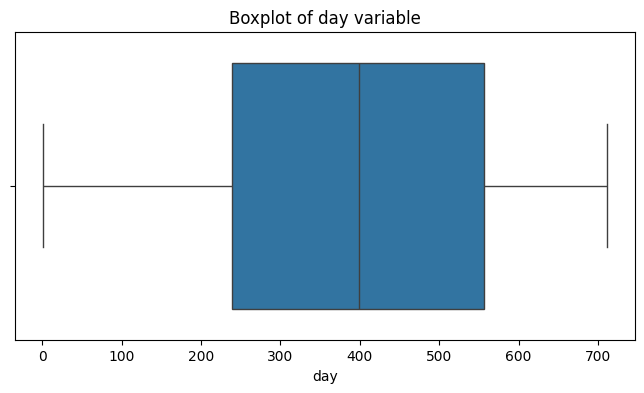

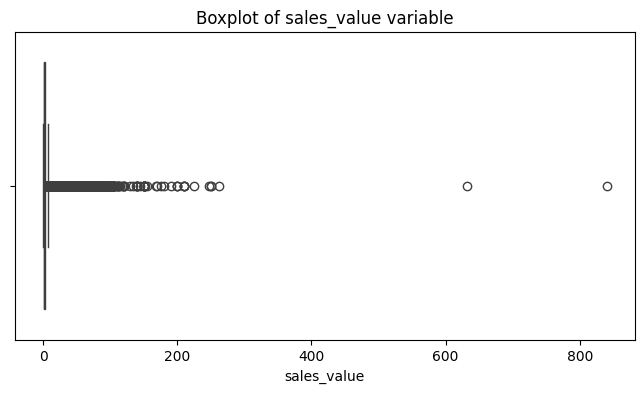

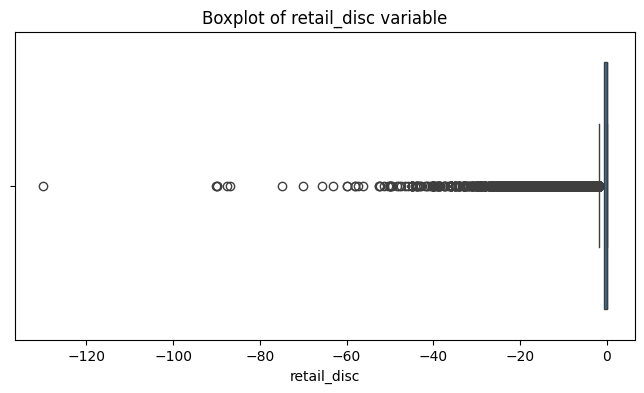

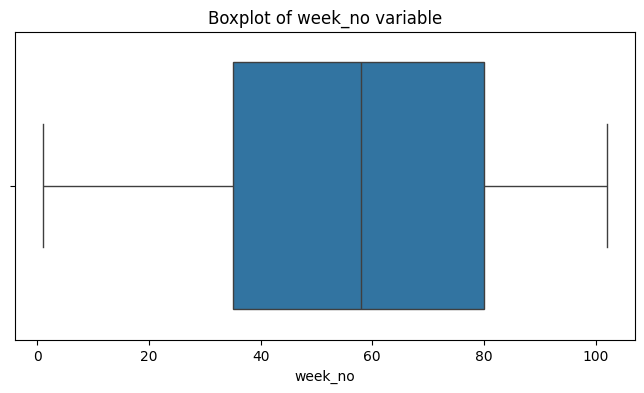

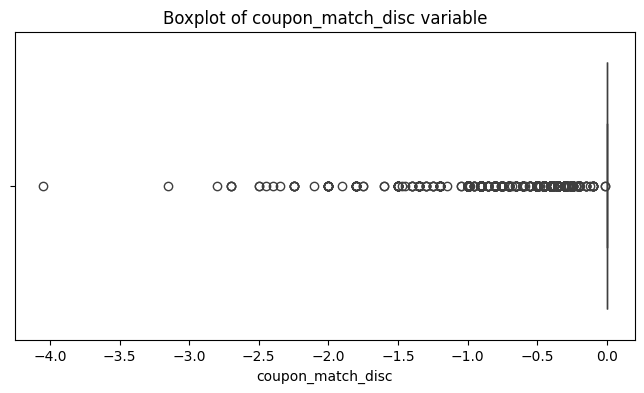

In [199]:
# Display a boxplot for each numeric column
for col in numeric_cols_to_check_outliers:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=final_merged_df[col])
    plt.title(f'Boxplot of {col} variable')
    plt.show()

In [200]:
# Detect outliers using the IQR method with a multiplier of 1.5
outliers = {}
for col in numeric_cols_to_check_outliers:
    Q1 = final_merged_df[col].quantile(0.25)
    Q3 = final_merged_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[col] = final_merged_df[(final_merged_df[col] < lower_bound) | (final_merged_df[col] > upper_bound)][col]

# Print number of outliers for 'day', 'sales_value', 'retail_disc', 'week_no' and 'coupon_match_disc' columns
for col, vals in outliers.items():
    print(f"{col}: {len(vals)} outliers")

day: 0 outliers
sales_value: 105752 outliers
retail_disc: 112150 outliers
week_no: 0 outliers
coupon_match_disc: 12245 outliers


In [201]:
# Initial detection with multiplier of 1.5 flagged 105752 sales_value and 112150 retail_disc outliers,
# which might be too aggresive for retail data with legitimate high sales value and retail discount transactions
# We further detect outliers using the IQR method with a multiplier of 100 to reduce this only 15 extreme cases to
# allows us to focus on extreme outliers rather than natural variability in sales and discount values.
outliers = {}
for col in numeric_cols_to_check_outliers:
    Q1 = final_merged_df[col].quantile(0.25)
    Q3 = final_merged_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 100 * IQR
    upper_bound = Q3 + 100 * IQR
    outliers[col] = final_merged_df[(final_merged_df[col] < lower_bound) | (final_merged_df[col] > upper_bound)][col]

# Print number of outliers for 'day', 'sales_value', 'retail_disc', 'week_no' and 'coupon_match_disc' columns
for col, values in outliers.items():
    print(f"{col}: {len(values)} outliers")

day: 0 outliers
sales_value: 7 outliers
retail_disc: 8 outliers
week_no: 0 outliers
coupon_match_disc: 12245 outliers


In [202]:
# Check the distribution of 'coupon_match_disc' to understand why this variable
# has the same number of outliers (12245) after we increased the multiplier to 100
print(final_merged_df['coupon_match_disc'].describe())
print(f"IQR: {final_merged_df['coupon_match_disc'].quantile(0.75) - final_merged_df['coupon_match_disc'].quantile(0.25)}")
print(f"% of zeros: {(final_merged_df['coupon_match_disc'] == 0).sum() / len(final_merged_df) * 100:.2f}%")

count    1.427303e+06
mean    -3.717872e-03
std      4.372860e-02
min     -4.050000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      0.000000e+00
Name: coupon_match_disc, dtype: float64
IQR: 0.0
% of zeros: 99.14%


The 'coupon_match_disc' variable still has the same number of outliers (12245) after we increased the multipler to 100.

We checked the distribution of the 'coupon_match_disc' variable and found that 99.14% of values are zero. This shows that coupon usage is very rare (less than 1% of transactions).

Since almost all transactions do not use coupons, 12245 transactions that use coupons appear as statistical outliers when using the IQR method. However, these non-zero coupon values are valid and represent legitimate discounts, so these outliers will be kept in the dataset.

In [203]:
# Further show rows with outliers in 'sales_value' and 'retail_disc' variables  using the IQR method with a multiplier of 100
outlier_rows = {}
for col in numeric_cols_to_check_outliers:
    Q1 = final_merged_df[col].quantile(0.25)
    Q3 = final_merged_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 100 * IQR
    upper_bound = Q3 + 100 * IQR
    outlier_rows[col] = final_merged_df[(final_merged_df[col] < lower_bound) | (final_merged_df[col] > upper_bound)]

# Print the rows with outliers for 'sales_value' and 'retail_disc' columns
for col, outlier_dataframe in outlier_rows.items():
    if col in ['sales_value', 'retail_disc']:
        print(f"\nRows with outliers for {col} variable:")
        display(outlier_dataframe)


Rows with outliers for sales_value variable:


,household_key,basket_id,day,sales_value,retail_disc,used_retailed_discount,week_no,used_coupon,coupon_match_disc,campaign_type,received_campaign,age_desc,income_desc,household_size_desc,kid_category_desc,product_category,brand,display,mailer,trans_time_sin,trans_time_cos,trans_time_day
36901,249,31198056289,284,246.60,0.00,no,41,no,0.0,did_not_receive_campaign_and_no_coupons,no,35-44,Under 15K,3,1,miscellaneous & services,National,missing_display_info,missing_advertisment_info,-0.852640,-0.522499,afternoon
560638,1609,32006114302,339,840.00,0.00,no,49,no,0.0,did_not_receive_campaign_and_no_coupons,no,45-54,125-149K,5+,3+,miscellaneous & services,Private,missing_display_info,missing_advertisment_info,-0.771625,0.636078,evening
1505943,346,40387571385,574,631.80,0.00,no,83,no,0.0,did_not_receive_campaign_and_no_coupons,no,65+,50-74K,2,0,health_personal_care,National,missing_display_info,missing_advertisment_info,-0.309017,-0.951057,afternoon
1914797,630,34749153595,503,250.00,-13.45,yes,73,no,0.0,did_not_receive_campaign_and_no_coupons,no,35-44,35-49K,3,1,miscellaneous & services,Private,missing_display_info,missing_advertisment_info,-0.928810,0.370557,evening
2139628,715,35688491342,530,261.58,0.00,no,76,no,0.0,received_campaign_and_16_coupons,yes,55-64,15-24K,2,0,miscellaneous & services,National,missing_display_info,missing_advertisment_info,-0.944089,-0.329691,afternoon
2332563,1812,33769986599,458,224.99,-75.00,yes,66,no,0.0,received_campaign_and_16_coupons,yes,45-54,50-74K,1,0,health_personal_care,Private,missing_display_info,missing_advertisment_info,-0.859406,-0.511293,afternoon
2394135,2181,41382982295,642,250.00,0.00,no,92,no,0.0,did_not_receive_campaign_and_no_coupons,no,55-64,100-124K,3,1,miscellaneous & services,Private,missing_display_info,missing_advertisment_info,-0.317305,-0.948324,afternoon



Rows with outliers for retail_disc variable:


,household_key,basket_id,day,sales_value,retail_disc,used_retailed_discount,week_no,used_coupon,coupon_match_disc,campaign_type,received_campaign,age_desc,income_desc,household_size_desc,kid_category_desc,product_category,brand,display,mailer,trans_time_sin,trans_time_cos,trans_time_day
301214,67,41297751573,636,39.99,-90.00,yes,92,no,0.0,received_campaign_and_16_coupons,yes,45-54,Under 15K,5+,3+,health_personal_care,National,not_displayed,on_advertisement,-0.566406,-0.824126,afternoon
655052,1653,40941495193,619,103.67,-130.02,yes,89,no,0.0,received_campaign_and_16_coupons,yes,35-44,Under 15K,1,0,meat,National,not_displayed,on_advertisement,0.970296,-0.241922,morning
733708,67,41259982473,634,39.99,-90.00,yes,91,no,0.0,received_campaign_and_16_coupons,yes,45-54,Under 15K,5+,3+,health_personal_care,National,not_displayed,on_advertisement,-0.809017,-0.587785,afternoon
864488,1357,32671310638,381,86.97,-86.97,yes,55,yes,0.0,received_campaign_and_16_coupons,yes,55-64,25-34K,2,0,health_personal_care,National,missing_display_info,missing_advertisment_info,0.263031,-0.964787,morning
1884067,101,33094735623,413,100.00,-87.60,yes,60,no,0.0,received_campaign_and_16_coupons,yes,45-54,Under 15K,4,2,general_grocery,National,not_displayed,on_advertisement,-0.258819,-0.965926,afternoon
2049180,2445,41931387767,684,9.99,-70.00,yes,98,no,0.0,received_campaign_and_all_coupons,yes,45-54,35-49K,1,0,health_personal_care,National,missing_display_info,missing_advertisment_info,-0.972370,0.233445,evening
2320148,1804,33192136377,421,152.21,-90.05,yes,61,no,0.0,received_campaign_and_16_coupons,yes,65+,35-49K,2,0,meat,National,not_displayed,on_advertisement,-0.915311,-0.402747,afternoon
2332563,1812,33769986599,458,224.99,-75.00,yes,66,no,0.0,received_campaign_and_16_coupons,yes,45-54,50-74K,1,0,health_personal_care,Private,missing_display_info,missing_advertisment_info,-0.859406,-0.511293,afternoon


In [204]:
# Check summary statistics for 'sales_value'
print("Summary statistic for sales_value:")
print(final_merged_df['sales_value'].describe())
print()

# Check summary statistics for 'retail_disc'
print("Summary statistic for retail_disc:")
print(final_merged_df['retail_disc'].describe())

Summary statistic for sales_value:
count    1.427303e+06
mean     3.151199e+00
std      4.251720e+00
min      0.000000e+00
25%      1.290000e+00
50%      2.090000e+00
75%      3.490000e+00
max      8.400000e+02
Name: sales_value, dtype: float64

Summary statistic for retail_disc:
count    1.427303e+06
mean    -5.347867e-01
std      1.225006e+00
min     -1.300200e+02
25%     -6.900000e-01
50%      0.000000e+00
75%      0.000000e+00
max      0.000000e+00
Name: retail_disc, dtype: float64


In [205]:
# Extract indices from sales_value outliers
sales_value_outlier_indices = outlier_rows['sales_value'].index
print(f"Number of sales_value outlier rows: {len(sales_value_outlier_indices)}")
print(f"Sales value outlier indices: {sales_value_outlier_indices.tolist()}")

# Extract indices from retail_disc outliers
retail_disc_outlier_indices = outlier_rows['retail_disc'].index
print(f"\nNumber of retail_disc outlier rows: {len(retail_disc_outlier_indices)}")
print(f"Retail disc outlier indices: {retail_disc_outlier_indices.tolist()}")

Number of sales_value outlier rows: 7
Sales value outlier indices: [36901, 560638, 1505943, 1914797, 2139628, 2332563, 2394135]

Number of retail_disc outlier rows: 8
Retail disc outlier indices: [301214, 655052, 733708, 864488, 1884067, 2049180, 2320148, 2332563]


In [206]:
# Access the outlier rows in final_merged_df_copy using these extracted indices
sales_outlier_rows_in_copy = final_merged_df_copy.loc[sales_value_outlier_indices]
print(f"\nSales value outlier rows from final_merged_df_copy:")
display(sales_outlier_rows_in_copy)

retail_outlier_rows_in_copy = final_merged_df_copy.loc[retail_disc_outlier_indices]
print(f"\nRetail disc outlier rows from final_merged_df_copy:")
display(retail_outlier_rows_in_copy)


Sales value outlier rows from final_merged_df_copy:


,household_key,basket_id,day,product_id,quantity,sales_value,store_id,retail_disc,trans_time,week_no,coupon_disc,coupon_match_disc,description,campaign,start_day,end_day,received_campaign,age_desc,marital_status_code,income_desc,homeowner_desc,hh_comp_desc,household_size_desc,kid_category_desc,manufacturer,department,brand,commodity_desc,sub_commodity_desc,curr_size_of_product,display,mailer,coupon_upc
36901,249,31198056289,284,1089093,3,246.60,289,0.00,1554,41,0.0,0.0,NaN,NaN,NaN,NaN,no,35-44,A,Under 15K,Renter,Unknown,3,1,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,,NaN,NaN,NaN
560638,1609,32006114302,339,12484608,3,840.00,412,0.00,2038,49,0.0,0.0,NaN,NaN,NaN,NaN,no,45-54,A,125-149K,Homeowner,2 Adults Kids,5+,3+,903,MISC SALES TRAN,Private,COUPON/MISC ITEMS,ELECTRONIC GIFT CARDS ACTIVATI,,NaN,NaN,NaN
1505943,346,40387571385,574,948670,5,631.80,415,0.00,1312,83,0.0,0.0,NaN,NaN,NaN,NaN,no,65+,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,2,DRUG GM,National,TICKETS,TICKETS,,NaN,NaN,NaN
1914797,630,34749153595,503,6534178,89638,250.00,384,-13.45,1927,73,0.0,0.0,NaN,NaN,NaN,NaN,no,35-44,A,35-49K,Homeowner,2 Adults Kids,3,1,69,KIOSK-GAS,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,,NaN,NaN,NaN
2139628,715,35688491342,530,1089093,5,261.58,354,0.00,1643,76,0.0,0.0,TypeA,13.0,504.0,551.0,yes,55-64,A,15-24K,Homeowner,2 Adults No Kids,2,None/Unknown,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,,NaN,NaN,NaN
2332563,1812,33769986599,458,13213237,1,224.99,31582,-75.00,1557,66,0.0,0.0,TypeA,8.0,412.0,460.0,yes,45-54,U,50-74K,Unknown,Single Female,1,None/Unknown,895,DRUG GM,Private,SPRING/SUMMER SEASONAL,PATIO SETS,10 PC,NaN,NaN,NaN
2394135,2181,41382982295,642,1134688,1,250.00,401,0.00,1314,92,0.0,0.0,NaN,NaN,NaN,NaN,no,55-64,A,100-124K,Homeowner,2 Adults Kids,3,1,69,MISC SALES TRAN,Private,COUPON/MISC ITEMS,ELECTRONIC GIFT CARDS REFRESH,,NaN,NaN,NaN



Retail disc outlier rows from final_merged_df_copy:


,household_key,basket_id,day,product_id,quantity,sales_value,store_id,retail_disc,trans_time,week_no,coupon_disc,coupon_match_disc,description,campaign,start_day,end_day,received_campaign,age_desc,marital_status_code,income_desc,homeowner_desc,hh_comp_desc,household_size_desc,kid_category_desc,manufacturer,department,brand,commodity_desc,sub_commodity_desc,curr_size_of_product,display,mailer,coupon_upc
301214,67,41297751573,636,17105530,1,39.99,415,-90.00,1418,92,0.0,0.0,TypeA,18.0,587.0,642.0,yes,45-54,A,Under 15K,Homeowner,2 Adults Kids,5+,3+,2695,DRUG GM,National,PREPAID WIRELESS&ACCESSORIES,MISC CARRIER,,0,A,NaN
655052,1653,40941495193,619,12810391,6,103.67,381,-130.02,656,89,0.0,0.0,TypeA,18.0,587.0,642.0,yes,35-44,B,Under 15K,Homeowner,Single Female,1,None/Unknown,3452,MEAT,National,PORK,ENHANCED,,0,D,NaN
733708,67,41259982473,634,17105530,1,39.99,415,-90.00,1536,91,0.0,0.0,TypeA,18.0,587.0,642.0,yes,45-54,A,Under 15K,Homeowner,2 Adults Kids,5+,3+,2695,DRUG GM,National,PREPAID WIRELESS&ACCESSORIES,MISC CARRIER,,0,A,NaN
864488,1357,32671310638,381,6978899,6,86.97,365,-86.97,1059,55,-4.5,0.0,NaN,NaN,NaN,NaN,no,55-64,A,25-34K,Homeowner,2 Adults No Kids,2,None/Unknown,869,DRUG GM,National,VITAMINS,VITAMIN - NON HERBAL SUPPLEMEN,120 CT,NaN,NaN,NaN
1884067,101,33094735623,413,5569845,40,100.00,441,-87.60,1300,60,0.0,0.0,TypeA,8.0,412.0,460.0,yes,45-54,A,Under 15K,Homeowner,2 Adults Kids,4,2,1208,GROCERY,National,SOFT DRINKS,SOFT DRINKS 12/18&15PK CAN CAR,12 OZ,0,D,NaN
2049180,2445,41931387767,684,12778577,1,9.99,315,-70.00,1854,98,0.0,0.0,TypeB,24.0,659.0,719.0,yes,45-54,U,35-49K,Unknown,Unknown,1,None/Unknown,5853,DRUG GM,National,PREPAID WIRELESS&ACCESSORIES,MISC CARRIER,,NaN,NaN,NaN
2320148,1804,33192136377,421,844179,40,152.21,408,-90.05,1625,61,0.0,0.0,TypeA,8.0,412.0,460.0,yes,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,2852,MEAT,National,BEEF,PRIMAL,,0,H,NaN
2332563,1812,33769986599,458,13213237,1,224.99,31582,-75.00,1557,66,0.0,0.0,TypeA,8.0,412.0,460.0,yes,45-54,U,50-74K,Unknown,Single Female,1,None/Unknown,895,DRUG GM,Private,SPRING/SUMMER SEASONAL,PATIO SETS,10 PC,NaN,NaN,NaN


There are no outliers for 'day' and 'week_no' variables. <br>
Although outliers are present in the'sales_values', 'retail_disc' and 'coupon_match_disc' variables, no abnormal values are observed, for example:
- No positive values for 'retail_disc' and 'coupon_match_disc'.
- No negative values for 'sales_value'. <br>

We will keep these outliers because the values are valid in the transactions. Abnormally high 'sales_value' may indicate high spending customers, while abnormally high negative retail discount values may indicate customers who are sensitive to discounts and might tend to pruchase more during promotions. As for the 'coupon_match_disc' variable, the outliers occur because almost all transactions do not use coupons, making the 12245 transactions that use coupons appear as statistical outliers when using the IQR method.

Additionally, there are many outliers, and removing them would further reduce the total numbenr of rows in the dataset.

We will re-evaluate these outliers after grouping the transactions by households.

# Group Transactions by Households

## Recency, Frequency and Monetaty (RFM) Variables

In [207]:
# Display the data type of each column in the 'final_merged_df' after creating variables and removing non-important variables
print(final_merged_df.dtypes)

household_key               int64
basket_id                   int64
day                         int64
sales_value               float64
retail_disc               float64
used_retailed_discount     object
week_no                     int64
used_coupon                object
coupon_match_disc         float64
campaign_type              object
received_campaign          object
age_desc                   object
income_desc                object
household_size_desc        object
kid_category_desc          object
product_category           object
brand                      object
display                    object
mailer                     object
trans_time_sin            float64
trans_time_cos            float64
trans_time_day             object
dtype: object


In [208]:
# Display first 5 rows of the dataset
final_merged_df.head(5)

,household_key,basket_id,day,sales_value,retail_disc,used_retailed_discount,week_no,used_coupon,coupon_match_disc,campaign_type,received_campaign,age_desc,income_desc,household_size_desc,kid_category_desc,product_category,brand,display,mailer,trans_time_sin,trans_time_cos,trans_time_day
0,979,40765361731,606,0.00,0.0,no,87,yes,0.0,received_campaign_and_16_coupons,yes,35-44,35-49K,2,1,miscellaneous & services,National,missing_display_info,missing_advertisment_info,-0.908143,-0.418660,afternoon
3,1228,31883657167,328,24.38,-1.6,yes,48,yes,0.0,received_campaign_and_16_coupons,yes,45-54,100-124K,1,0,seafood,Private,not_displayed,on_advertisement,-0.636078,-0.771625,afternoon
4,17,28179613679,100,103.32,0.0,no,15,yes,0.0,received_campaign_and_16_coupons,yes,65+,Under 15K,2,0,health_personal_care,National,missing_display_info,missing_advertisment_info,-0.996566,-0.082808,evening
8,888,28601552856,128,14.39,-1.6,yes,19,yes,0.0,received_campaign_and_16_coupons,yes,25-34,150-174K,3,1,deli & bakery,Private,missing_display_info,missing_advertisment_info,-0.996917,0.078459,evening
9,400,32173185680,353,0.00,0.0,no,51,yes,0.0,received_campaign_and_16_coupons,yes,35-44,150-174K,3,1,miscellaneous & services,National,missing_display_info,missing_advertisment_info,-0.473320,-0.880891,afternoon


In [209]:
# Check the minimum and maximum values of 'day' variable
min_day = final_merged_df['day'].min()
max_day = final_merged_df['day'].max()

print("Minimum value of 'day' variable:", min_day)
print("Maximum value of of 'day' variable:", max_day)

Minimum value of 'day' variable: 1
Maximum value of of 'day' variable: 711


In [210]:
# Calculate last transaction day for each household
last_purchase = final_merged_df.groupby('household_key')['day'].max().reset_index()
last_purchase = last_purchase.rename(columns={'day': 'last_day'})

# Calculate recency (days since the customer's most recent transaction)
last_purchase['recency'] = max_day - last_purchase['last_day']

# Create recency dataframe
recency_df = last_purchase[['household_key', 'recency']]
recency_df.head()

,household_key,recency
0,1,5
1,7,2
2,8,5
3,13,2
4,16,21


In [211]:
# Calculate frequency (Number of unique transactions per household)
frequency_df = final_merged_df.groupby('household_key')['basket_id'].nunique().reset_index()
frequency_df = frequency_df.rename(columns={'basket_id': 'frequency'})

# Display first 5 rows of the dataset
frequency_df.head()

,household_key,frequency
0,1,86
1,7,59
2,8,113
3,13,275
4,16,98


In [212]:
# Calculate monetary (Number of unique transactions per household)
monetary_df = final_merged_df.groupby('household_key')['sales_value'].sum().reset_index()
monetary_df = monetary_df.rename(columns={'sales_value': 'monetary'})

# Display first 5 rows of the dataset
monetary_df.head()

,household_key,monetary
0,1,4330.16
1,7,3400.05
2,8,5534.97
3,13,13190.92
4,16,1512.02


In [213]:
# Combine Recency, Frequency, and Monetary dataframes into a single RFM dataframe
rfm_df = (
    recency_df[['household_key', 'recency']]
        .merge(frequency_df, on='household_key')
        .merge(monetary_df, on='household_key')
)

# Display first 5 rows of the dataset
rfm_df.head()

,household_key,recency,frequency,monetary
0,1,5,86,4330.16
1,7,2,59,3400.05
2,8,5,113,5534.97
3,13,2,275,13190.92
4,16,21,98,1512.02


In [214]:
rfm_summary = pd.DataFrame({
    'Household Key': [rfm_df['household_key'].min(), rfm_df['household_key'].max()],
    'Recency': [rfm_df['recency'].min(), rfm_df['recency'].max()],
    'Frequency': [rfm_df['frequency'].min(), rfm_df['frequency'].max()],
    'Monetary': [rfm_df['monetary'].min(), rfm_df['monetary'].max()]
}, index=['Min', 'Max'])

print(rfm_summary)

     Household Key  Recency  Frequency  Monetary
Min              1        0         22    646.40
Max           2499      155       1223  27859.68


In [215]:
# Check the number of rows in 'rfm_df'
print("Number of rows in 'rfm_df':", rfm_df.shape[0])

Number of rows in 'rfm_df': 801


## Demographic Variables

In [216]:
# Create a demographic dataframe with one row per household containing demographics info
demographic_df = (final_merged_df[
        ['household_key',
         'age_desc',
         'income_desc',
         'household_size_desc',
         'kid_category_desc']
    ]
    .drop_duplicates(subset='household_key')
    .sort_values('household_key')
    .reset_index(drop=True)
)

# Display first 5 rows of the dataset
demographic_df.head()

,household_key,age_desc,income_desc,household_size_desc,kid_category_desc
0,1,65+,35-49K,2,0
1,7,45-54,50-74K,2,0
2,8,25-34,25-34K,3,1
3,13,25-34,75-99K,4,2
4,16,45-54,50-74K,1,0


In [217]:
# Check the number of rows in 'demographic_df'
print("Number of rows in 'demographic_df':", demographic_df.shape[0])

Number of rows in 'demographic_df': 801


## Retail Discount Variables

In [218]:
# Calculate each household's average retail discount, the proportion of transactions where a retail discount
# was used and the proportion of transactions where a retail discount was not used.
# retail_discount_mean: the average retail discount amount that each household received across all the transactions.
# retail_discount_usage_proportion: the proportion of transactions where each household used a retail discount.
# retail_discount_no_usage_proportion: the proportion of transactions where each household did not use a retail discount.
retail_discount_df = (
    final_merged_df.groupby('household_key')
    .agg(
        retail_discount_mean=('retail_disc', 'mean'),
        retail_discount_usage_proportion=('used_retailed_discount', lambda x: (x == 'yes').mean()),
        retail_discount_no_usage_proportion=('used_retailed_discount', lambda x: (x == 'no').mean())
    )
    .reset_index()
)

# Convert to positive for better interpretability
retail_discount_df['retail_discount_mean'] = retail_discount_df['retail_discount_mean'].abs()

# Display first 5 rows of the dataset
retail_discount_df.head()

,household_key,retail_discount_mean,retail_discount_usage_proportion,retail_discount_no_usage_proportion
0,1,0.403613,0.439490,0.560510
1,7,0.375202,0.444012,0.555988
2,8,0.544871,0.509853,0.490147
3,13,0.693011,0.518313,0.481687
4,16,0.331315,0.346228,0.653772


In [219]:
# Check the number of rows in 'retail_discount_df'
print("Number of rows in 'retail_discsount_df':", retail_discount_df.shape[0])

Number of rows in 'retail_discsount_df': 801


## Coupon Discount Variables

In [220]:
# Calculate each household's average coupon discount, the proportion of transactions where a coupon discount
# was used and the proportion of transactions where a coupon discount was not used.
# coupon_discount_mean: the average coupon discount amount that each household received across all the transactions.
# coupon_discount_usage_proportion: the proportion of transactions where each household used a coupon discount.
# coupon_discount_no_usage_proportion: the proportion of transactions where each household did not use a coupon discount.
coupon_discount_df = (
    final_merged_df.groupby('household_key')
    .agg(
        coupon_discount_mean=('coupon_match_disc', 'mean'),
        coupon_discount_usage_proportion=('used_coupon', lambda x: (x == 'yes').mean()),
        coupon_discount_no_usage_proportion=('used_coupon', lambda x: (x == 'no').mean())
    )
    .reset_index()
)

# Convert to positive for better interpretability
coupon_discount_df['coupon_discount_mean'] = coupon_discount_df['coupon_discount_mean'].abs()

# Display first 5 rows of the dataset
coupon_discount_df.head()

,household_key,coupon_discount_mean,coupon_discount_usage_proportion,coupon_discount_no_usage_proportion
0,1,0.015142,0.061378,0.938622
1,7,0.004005,0.020995,0.979005
2,8,0.000935,0.012127,0.987873
3,13,0.033113,0.127768,0.872232
4,16,0.000000,0.001934,0.998066


In [221]:
# Check the number of rows in 'coupon_discount_df'
print("Number of rows in 'coupon_discsount_df':", coupon_discount_df.shape[0])

Number of rows in 'coupon_discsount_df': 801


## Campaign Type Variables

In [222]:
# Display unique values for 'campaign_type' variables
campaign_types = final_merged_df['campaign_type'].unique().tolist()

print("Unique campaign_type values:")
print(campaign_types)

Unique campaign_type values:
['received_campaign_and_16_coupons', 'received_campaign_and_all_coupons', 'did_not_receive_campaign_and_no_coupons']


In [223]:
# Count each campaign type per household
campaign_type_counts = final_merged_df.groupby(['household_key', 'campaign_type']).size().unstack(fill_value=0)

# Convert to proportions
campaign_type_df = (
    campaign_type_counts
    .div(campaign_type_counts.sum(axis=1), axis=0)
    .add_suffix("_proportion")
    .rename_axis(None, axis=1)
    .reset_index()
)

# Display first 5 rows of the dataset
campaign_type_df.head()

,household_key,did_not_receive_campaign_and_no_coupons_proportion,received_campaign_and_16_coupons_proportion,received_campaign_and_all_coupons_proportion
0,1,0.549508,0.286624,0.163868
1,7,0.744946,0.122862,0.132193
2,8,0.527539,0.285498,0.186963
3,13,0.471891,0.320273,0.207836
4,16,0.843327,0.058027,0.098646


In [224]:
# Check the number of rows in 'campaign_type_df'
print("Number of rows in 'campaign_type_df':", campaign_type_df.shape[0])

Number of rows in 'campaign_type_df': 801


## Time of Day Category Variables

In [225]:
# Display unique values for 'trans_time_day' variables
trans_time_days = final_merged_df['trans_time_day'].unique().tolist()

print("Unique trans_time_day values:")
print(trans_time_days)

Unique trans_time_day values:
['afternoon', 'evening', 'morning', 'night', 'midnight']


In [226]:
# Count each time of day category per household
time_of_day_category_counts = final_merged_df.groupby(['household_key', 'trans_time_day']).size().unstack(fill_value=0)

# Convert to proportions
time_of_day_category_df = (
    time_of_day_category_counts
    .div(time_of_day_category_counts.sum(axis=1), axis=0)
    .add_suffix("_proportion")
    .rename_axis(None, axis=1)
    .reset_index()
)

# Display first 5 rows of the dataset
time_of_day_category_df.head()

,household_key,afternoon_proportion,evening_proportion,midnight_proportion,morning_proportion,night_proportion
0,1,0.612623,0.101911,0.000000,0.285466,0.000000
1,7,0.541213,0.330482,0.000000,0.010886,0.117418
2,8,0.264780,0.409298,0.000000,0.204144,0.121779
3,13,0.302811,0.465928,0.003833,0.168654,0.058773
4,16,0.485493,0.158607,0.000000,0.355899,0.000000


In [227]:
# Check the number of rows in 'time_of_day_df'
print("Number of rows in 'time_of_day_df':", time_of_day_category_df.shape[0])

Number of rows in 'time_of_day_df': 801


## Display Category Variables

In [228]:
# Display unique values for 'display' variables
displays = final_merged_df['display'].unique().tolist()

print("Unique display values:")
print(displays)

Unique display values:
['missing_display_info', 'not_displayed', 'displayed']


In [229]:
# Count each display category per household
display_category_counts = final_merged_df.groupby(['household_key', 'display']).size().unstack(fill_value=0)

# Convert to proportions
display_category_df = (
    display_category_counts
    .div(display_category_counts.sum(axis=1), axis=0)
    .add_suffix("_proportion")
    .rename_axis(None, axis=1)
    .reset_index()
)

# Display first 5 rows of the dataset
display_category_df.head()

,household_key,displayed_proportion,missing_display_info_proportion,not_displayed_proportion
0,1,0.095541,0.830921,0.073538
1,7,0.028771,0.888025,0.083204
2,8,0.112178,0.763517,0.124305
3,13,0.134583,0.774702,0.090716
4,16,0.003868,0.996132,0.000000


In [230]:
# Check the number of rows in 'display_category_df'
print("Number of rows in 'display_category_df':", display_category_df.shape[0])

Number of rows in 'display_category_df': 801


## Mailer Category Variables

In [231]:
# Display unique values for 'mailer' variables
mailers = final_merged_df['mailer'].unique().tolist()

print("Unique mailer values:")
print(mailers)

Unique mailer values:
['missing_advertisment_info', 'on_advertisement', 'not_on_advertisement']


In [232]:
# Count each mailer category per household
mailer_category_counts = final_merged_df.groupby(['household_key', 'mailer']).size().unstack(fill_value=0)

# Convert to proportions
mailer_category_df = (
    mailer_category_counts
    .div(mailer_category_counts.sum(axis=1), axis=0)
    .add_suffix("_proportion")
    .rename_axis(None, axis=1)
    .reset_index()
)

# Display first 5 rows of the dataset
mailer_category_df.head()

,household_key,missing_advertisment_info_proportion,not_on_advertisement_proportion,on_advertisement_proportion
0,1,0.830921,0.054430,0.114650
1,7,0.888025,0.021773,0.090202
2,8,0.763517,0.057605,0.178878
3,13,0.774702,0.084327,0.140971
4,16,0.996132,0.003868,0.000000


In [233]:
# Check the number of rows in 'mailer_category_df'
print("Number of rows in 'mailer_category_df':", mailer_category_df.shape[0])

Number of rows in 'mailer_category_df': 801


## Brand Category Variables

In [234]:
# Convert the category in 'brand' variables to lowercase
final_merged_df['brand'] = final_merged_df['brand'].str.lower()

# Display unique values for 'brand' variables
brands = final_merged_df['brand'].unique().tolist()

print("Unique brand values:")
print(brands)

Unique brand values:
['national', 'private']


In [235]:
# Count each brand category per household
brand_category_counts = final_merged_df.groupby(['household_key', 'brand']).size().unstack(fill_value=0)

# Convert to proportions
brand_category_df = (
    brand_category_counts
    .div(brand_category_counts.sum(axis=1), axis=0)
    .add_suffix("_proportion")
    .rename_axis(None, axis=1)
    .reset_index()
)

# Display first 5 rows of the dataset
brand_category_df.head()

,household_key,national_proportion,private_proportion
0,1,0.882455,0.117545
1,7,0.598756,0.401244
2,8,0.765033,0.234967
3,13,0.697615,0.302385
4,16,0.787234,0.212766


In [236]:
# Check the number of rows in 'brand_category_df'
print("Number of rows in 'brand_category_df':", brand_category_df.shape[0])

Number of rows in 'brand_category_df': 801


## Product Category Variables

In [237]:
# Display unique values for 'product_category' variables
product_categories = final_merged_df['product_category'].unique().tolist()

print("Unique product_category values:")
print(product_categories)

Unique product_category values:
['miscellaneous & services', 'seafood', 'health_personal_care', 'deli & bakery', 'general_grocery', 'home & lifestyle', 'meat', 'produce', 'entertainment & leisure', 'alcohol']


In [238]:
# Count each product category per household
product_category_counts = final_merged_df.groupby(['household_key', 'product_category']).size().unstack(fill_value=0)

# Convert to proportions
product_category_df = (
    product_category_counts
    .div(product_category_counts.sum(axis=1), axis=0)
    .add_suffix("_proportion")
    .rename_axis(None, axis=1)
    .reset_index()
)

# Display first 5 rows of the dataset
product_category_df.head()

,household_key,alcohol_proportion,deli & bakery_proportion,entertainment & leisure_proportion,general_grocery_proportion,health_personal_care_proportion,home & lifestyle_proportion,meat_proportion,miscellaneous & services_proportion,produce_proportion,seafood_proportion
0,1,0.000000,0.066589,0.0,0.658946,0.110017,0.000579,0.064852,0.008686,0.090330,0.000000
1,7,0.000000,0.031882,0.0,0.645412,0.174184,0.000778,0.048989,0.004666,0.093313,0.000778
2,8,0.002527,0.036887,0.0,0.692269,0.099040,0.006569,0.068722,0.008590,0.081354,0.004042
3,13,0.000000,0.015332,0.0,0.641823,0.186968,0.002129,0.036627,0.066014,0.048552,0.002555
4,16,0.000000,0.102515,0.0,0.661509,0.071567,0.000000,0.063830,0.015474,0.085106,0.000000


In [239]:
# Check the number of rows in 'product_category_df'
print("Number of rows in 'product_category_df':", product_category_df.shape[0])

Number of rows in 'product_category_df': 801


## Merge All The Datasets That Were Grouped By Household Key

In [240]:
# List all household-level dataframes
dataset_to_be_merged = [
    demographic_df,
    rfm_df,
    retail_discount_df,
    coupon_discount_df,
    campaign_type_df,
    time_of_day_category_df,
    display_category_df,
    mailer_category_df,
    brand_category_df,
    product_category_df
]

# Merge all household-level dataframes on household_key
household_profile_df = reduce(lambda left, right:
                  pd.merge(left, right, on='household_key', how='left'),
                  dataset_to_be_merged)

# Display first 5 rows of the dataset
household_profile_df.head()

,household_key,age_desc,income_desc,household_size_desc,kid_category_desc,recency,frequency,monetary,retail_discount_mean,retail_discount_usage_proportion,retail_discount_no_usage_proportion,coupon_discount_mean,coupon_discount_usage_proportion,coupon_discount_no_usage_proportion,did_not_receive_campaign_and_no_coupons_proportion,received_campaign_and_16_coupons_proportion,received_campaign_and_all_coupons_proportion,afternoon_proportion,evening_proportion,midnight_proportion,morning_proportion,night_proportion,displayed_proportion,missing_display_info_proportion,not_displayed_proportion,missing_advertisment_info_proportion,not_on_advertisement_proportion,on_advertisement_proportion,national_proportion,private_proportion,alcohol_proportion,deli & bakery_proportion,entertainment & leisure_proportion,general_grocery_proportion,health_personal_care_proportion,home & lifestyle_proportion,meat_proportion,miscellaneous & services_proportion,produce_proportion,seafood_proportion
0,1,65+,35-49K,2,0,5,86,4330.16,0.403613,0.439490,0.560510,0.015142,0.061378,0.938622,0.549508,0.286624,0.163868,0.612623,0.101911,0.000000,0.285466,0.000000,0.095541,0.830921,0.073538,0.830921,0.054430,0.114650,0.882455,0.117545,0.000000,0.066589,0.0,0.658946,0.110017,0.000579,0.064852,0.008686,0.090330,0.000000
1,7,45-54,50-74K,2,0,2,59,3400.05,0.375202,0.444012,0.555988,0.004005,0.020995,0.979005,0.744946,0.122862,0.132193,0.541213,0.330482,0.000000,0.010886,0.117418,0.028771,0.888025,0.083204,0.888025,0.021773,0.090202,0.598756,0.401244,0.000000,0.031882,0.0,0.645412,0.174184,0.000778,0.048989,0.004666,0.093313,0.000778
2,8,25-34,25-34K,3,1,5,113,5534.97,0.544871,0.509853,0.490147,0.000935,0.012127,0.987873,0.527539,0.285498,0.186963,0.264780,0.409298,0.000000,0.204144,0.121779,0.112178,0.763517,0.124305,0.763517,0.057605,0.178878,0.765033,0.234967,0.002527,0.036887,0.0,0.692269,0.099040,0.006569,0.068722,0.008590,0.081354,0.004042
3,13,25-34,75-99K,4,2,2,275,13190.92,0.693011,0.518313,0.481687,0.033113,0.127768,0.872232,0.471891,0.320273,0.207836,0.302811,0.465928,0.003833,0.168654,0.058773,0.134583,0.774702,0.090716,0.774702,0.084327,0.140971,0.697615,0.302385,0.000000,0.015332,0.0,0.641823,0.186968,0.002129,0.036627,0.066014,0.048552,0.002555
4,16,45-54,50-74K,1,0,21,98,1512.02,0.331315,0.346228,0.653772,0.000000,0.001934,0.998066,0.843327,0.058027,0.098646,0.485493,0.158607,0.000000,0.355899,0.000000,0.003868,0.996132,0.000000,0.996132,0.003868,0.000000,0.787234,0.212766,0.000000,0.102515,0.0,0.661509,0.071567,0.000000,0.063830,0.015474,0.085106,0.000000


In [241]:
# Check the number of rows and columns in 'household_profile_df'
print("Number of rows in 'household_profile_df':", household_profile_df.shape[0])
print("Number of columns in 'household_profile_df':", household_profile_df.shape[1])

Number of rows in 'household_profile_df': 801
Number of columns in 'household_profile_df': 40


In [242]:
# Display the data type of each column in the 'household_profile_df' after merging all household-level dataframes
print(household_profile_df.dtypes)

household_key                                           int64
age_desc                                               object
income_desc                                            object
household_size_desc                                    object
kid_category_desc                                      object
recency                                                 int64
frequency                                               int64
monetary                                              float64
retail_discount_mean                                  float64
retail_discount_usage_proportion                      float64
retail_discount_no_usage_proportion                   float64
coupon_discount_mean                                  float64
coupon_discount_usage_proportion                      float64
coupon_discount_no_usage_proportion                   float64
did_not_receive_campaign_and_no_coupons_proportion    float64
received_campaign_and_16_coupons_proportion           float64
received

# Apply Ordinal Encoding To Categorical Variables

In [243]:
# Create a list for all categorical variables
categorical_variables_list = ['age_desc', 'income_desc',
                    'household_size_desc', 'kid_category_desc']

# Count the number of different groups in each demographic variable
for col in categorical_variables_list:
    print(f"Value counts for {col}:")
    print(household_profile_df[col].value_counts())
    print()

Value counts for age_desc:
age_desc
45-54    288
35-44    194
25-34    142
65+       72
55-64     59
19-24     46
Name: count, dtype: int64

Value counts for income_desc:
income_desc
50-74K       192
35-49K       172
75-99K        96
25-34K        77
15-24K        74
Under 15K     61
125-149K      38
100-124K      34
150-174K      30
250K+         11
175-199K      11
200-249K       5
Name: count, dtype: int64

Value counts for household_size_desc:
household_size_desc
2     318
1     255
3     109
5+     66
4      53
Name: count, dtype: int64

Value counts for kid_category_desc:
kid_category_desc
0     558
1     114
3+     69
2      60
Name: count, dtype: int64



In [244]:
# Age - Ordinal Encoding
age_order = ['19-24', '25-34', '35-44', '45-54', '55-64', '65+']
age_mapping = {age: i for i, age in enumerate(age_order)}
household_profile_df['age_encoded'] = household_profile_df['age_desc'].map(age_mapping)

# Income - Ordinal Encoding
income_order = ['Under 15K', '15-24K', '25-34K', '35-49K', '50-74K',
                '75-99K', '100-124K', '125-149K', '150-174K',
                '175-199K', '200-249K', '250K+']
income_mapping = {income: i for i, income in enumerate(income_order)}
household_profile_df['income_encoded'] = household_profile_df['income_desc'].map(income_mapping)

# Household Size - Ordinal Encoding
household_size_order = ['1', '2', '3', '4', '5+']
household_size_mapping = {size: i for i, size in enumerate(household_size_order)}
household_profile_df['household_size_encoded'] = household_profile_df['household_size_desc'].map(household_size_mapping)

# Kid Category - Ordinal Encoding
# Convert all values in ''kid_category_desc' variable to string
household_profile_df['kid_category_desc'] = household_profile_df['kid_category_desc'].astype(str)

kid_order = ['0', '1', '2', '3+']
kid_mapping = {kid: i for i, kid in enumerate(kid_order)}
household_profile_df['kid_category_encoded'] = household_profile_df['kid_category_desc'].map(kid_mapping)

In [245]:
# Verify if the encoding works
print("Age encoding verification:")
print(household_profile_df[['age_desc', 'age_encoded']].drop_duplicates().sort_values('age_encoded'))

print("\nIncome encoding verification:")
print(household_profile_df[['income_desc', 'income_encoded']].drop_duplicates().sort_values('income_encoded'))

print("\nHousehold size encoding verification:")
print(household_profile_df[['household_size_desc', 'household_size_encoded']].drop_duplicates().sort_values('household_size_encoded'))

print("\nKid category encoding verification:")
print(household_profile_df[['kid_category_desc', 'kid_category_encoded']].drop_duplicates().sort_values('kid_category_encoded'))

# Check for any missing values (NaN) after encoding
print("\nMissing values check:")
print(household_profile_df[['age_encoded', 'income_encoded', 'household_size_encoded', 'kid_category_encoded']].isnull().sum())

Age encoding verification:
   age_desc  age_encoded
18    19-24            0
2     25-34            1
7     35-44            2
1     45-54            3
22    55-64            4
0       65+            5

Income encoding verification:
    income_desc  income_encoded
5     Under 15K               0
7        15-24K               1
2        25-34K               2
0        35-49K               3
1        50-74K               4
3        75-99K               5
6      100-124K               6
13     125-149K               7
17     150-174K               8
247    175-199K               9
280    200-249K              10
82        250K+              11

Household size encoding verification:
   household_size_desc  household_size_encoded
4                    1                       0
0                    2                       1
2                    3                       2
3                    4                       3
16                  5+                       4

Kid category encoding verific

In [246]:
# Display first 5 rows of the dataset
household_profile_df.head()

,household_key,age_desc,income_desc,household_size_desc,kid_category_desc,recency,frequency,monetary,retail_discount_mean,retail_discount_usage_proportion,retail_discount_no_usage_proportion,coupon_discount_mean,coupon_discount_usage_proportion,coupon_discount_no_usage_proportion,did_not_receive_campaign_and_no_coupons_proportion,received_campaign_and_16_coupons_proportion,received_campaign_and_all_coupons_proportion,afternoon_proportion,evening_proportion,midnight_proportion,morning_proportion,night_proportion,displayed_proportion,missing_display_info_proportion,not_displayed_proportion,missing_advertisment_info_proportion,not_on_advertisement_proportion,on_advertisement_proportion,national_proportion,private_proportion,alcohol_proportion,deli & bakery_proportion,entertainment & leisure_proportion,general_grocery_proportion,health_personal_care_proportion,home & lifestyle_proportion,meat_proportion,miscellaneous & services_proportion,produce_proportion,seafood_proportion,age_encoded,income_encoded,household_size_encoded,kid_category_encoded
0,1,65+,35-49K,2,0,5,86,4330.16,0.403613,0.439490,0.560510,0.015142,0.061378,0.938622,0.549508,0.286624,0.163868,0.612623,0.101911,0.000000,0.285466,0.000000,0.095541,0.830921,0.073538,0.830921,0.054430,0.114650,0.882455,0.117545,0.000000,0.066589,0.0,0.658946,0.110017,0.000579,0.064852,0.008686,0.090330,0.000000,5,3,1,0
1,7,45-54,50-74K,2,0,2,59,3400.05,0.375202,0.444012,0.555988,0.004005,0.020995,0.979005,0.744946,0.122862,0.132193,0.541213,0.330482,0.000000,0.010886,0.117418,0.028771,0.888025,0.083204,0.888025,0.021773,0.090202,0.598756,0.401244,0.000000,0.031882,0.0,0.645412,0.174184,0.000778,0.048989,0.004666,0.093313,0.000778,3,4,1,0
2,8,25-34,25-34K,3,1,5,113,5534.97,0.544871,0.509853,0.490147,0.000935,0.012127,0.987873,0.527539,0.285498,0.186963,0.264780,0.409298,0.000000,0.204144,0.121779,0.112178,0.763517,0.124305,0.763517,0.057605,0.178878,0.765033,0.234967,0.002527,0.036887,0.0,0.692269,0.099040,0.006569,0.068722,0.008590,0.081354,0.004042,1,2,2,1
3,13,25-34,75-99K,4,2,2,275,13190.92,0.693011,0.518313,0.481687,0.033113,0.127768,0.872232,0.471891,0.320273,0.207836,0.302811,0.465928,0.003833,0.168654,0.058773,0.134583,0.774702,0.090716,0.774702,0.084327,0.140971,0.697615,0.302385,0.000000,0.015332,0.0,0.641823,0.186968,0.002129,0.036627,0.066014,0.048552,0.002555,1,5,3,2
4,16,45-54,50-74K,1,0,21,98,1512.02,0.331315,0.346228,0.653772,0.000000,0.001934,0.998066,0.843327,0.058027,0.098646,0.485493,0.158607,0.000000,0.355899,0.000000,0.003868,0.996132,0.000000,0.996132,0.003868,0.000000,0.787234,0.212766,0.000000,0.102515,0.0,0.661509,0.071567,0.000000,0.063830,0.015474,0.085106,0.000000,3,4,0,0


In [247]:
# Define columns to drop
columns_to_drop = ['age_desc', 'income_desc', 'household_size_desc', 'kid_category_desc']

# Drop the original categorical columns
household_profile_df = household_profile_df.drop(columns=columns_to_drop)

# Reorder columns to move encoded variables after household_key
encoded_cols = ['age_encoded', 'income_encoded', 'household_size_encoded', 'kid_category_encoded']

# Get all other columns (excluding household_key and encoded columns)
other_cols = [col for col in household_profile_df.columns
              if col != 'household_key' and col not in encoded_cols]

# Reorder the household profiel dataset: household_key, then encoded columns, then other columns
new_column_order = ['household_key'] + encoded_cols + other_cols

household_profile_df = household_profile_df[new_column_order]

# Display first 5 rows of the dataset
household_profile_df.head()

,household_key,age_encoded,income_encoded,household_size_encoded,kid_category_encoded,recency,frequency,monetary,retail_discount_mean,retail_discount_usage_proportion,retail_discount_no_usage_proportion,coupon_discount_mean,coupon_discount_usage_proportion,coupon_discount_no_usage_proportion,did_not_receive_campaign_and_no_coupons_proportion,received_campaign_and_16_coupons_proportion,received_campaign_and_all_coupons_proportion,afternoon_proportion,evening_proportion,midnight_proportion,morning_proportion,night_proportion,displayed_proportion,missing_display_info_proportion,not_displayed_proportion,missing_advertisment_info_proportion,not_on_advertisement_proportion,on_advertisement_proportion,national_proportion,private_proportion,alcohol_proportion,deli & bakery_proportion,entertainment & leisure_proportion,general_grocery_proportion,health_personal_care_proportion,home & lifestyle_proportion,meat_proportion,miscellaneous & services_proportion,produce_proportion,seafood_proportion
0,1,5,3,1,0,5,86,4330.16,0.403613,0.439490,0.560510,0.015142,0.061378,0.938622,0.549508,0.286624,0.163868,0.612623,0.101911,0.000000,0.285466,0.000000,0.095541,0.830921,0.073538,0.830921,0.054430,0.114650,0.882455,0.117545,0.000000,0.066589,0.0,0.658946,0.110017,0.000579,0.064852,0.008686,0.090330,0.000000
1,7,3,4,1,0,2,59,3400.05,0.375202,0.444012,0.555988,0.004005,0.020995,0.979005,0.744946,0.122862,0.132193,0.541213,0.330482,0.000000,0.010886,0.117418,0.028771,0.888025,0.083204,0.888025,0.021773,0.090202,0.598756,0.401244,0.000000,0.031882,0.0,0.645412,0.174184,0.000778,0.048989,0.004666,0.093313,0.000778
2,8,1,2,2,1,5,113,5534.97,0.544871,0.509853,0.490147,0.000935,0.012127,0.987873,0.527539,0.285498,0.186963,0.264780,0.409298,0.000000,0.204144,0.121779,0.112178,0.763517,0.124305,0.763517,0.057605,0.178878,0.765033,0.234967,0.002527,0.036887,0.0,0.692269,0.099040,0.006569,0.068722,0.008590,0.081354,0.004042
3,13,1,5,3,2,2,275,13190.92,0.693011,0.518313,0.481687,0.033113,0.127768,0.872232,0.471891,0.320273,0.207836,0.302811,0.465928,0.003833,0.168654,0.058773,0.134583,0.774702,0.090716,0.774702,0.084327,0.140971,0.697615,0.302385,0.000000,0.015332,0.0,0.641823,0.186968,0.002129,0.036627,0.066014,0.048552,0.002555
4,16,3,4,0,0,21,98,1512.02,0.331315,0.346228,0.653772,0.000000,0.001934,0.998066,0.843327,0.058027,0.098646,0.485493,0.158607,0.000000,0.355899,0.000000,0.003868,0.996132,0.000000,0.996132,0.003868,0.000000,0.787234,0.212766,0.000000,0.102515,0.0,0.661509,0.071567,0.000000,0.063830,0.015474,0.085106,0.000000


# Apply Centered Log-Ratio Transformation To Compositional Variables

In [248]:
# Grouping proportions of retail discount usage vs non-usage
retail_discount_groups = [
    ['retail_discount_usage_proportion', 'retail_discount_no_usage_proportion']
]

# Grouping proportions of coupon usage vs non-usage
coupon_discount_groups = [
    ['coupon_discount_usage_proportion', 'coupon_discount_no_usage_proportion']
]

# Grouping proportions of campaign exposure and coupon receipt
campaign_groups = [
    ['did_not_receive_campaign_and_no_coupons_proportion',
     'received_campaign_and_16_coupons_proportion',
     'received_campaign_and_all_coupons_proportion']
]

# Grouping proportions of purchases by time of day
time_of_day_groups = [
    ['morning_proportion', 'afternoon_proportion', 'evening_proportion',
     'midnight_proportion', 'night_proportion']
]

# Grouping proportions of product display exposure
display_groups = [
    ['displayed_proportion', 'missing_display_info_proportion', 'not_displayed_proportion']
]

# Grouping proportions of advertisement exposure
advertisement_groups = [
    ['on_advertisement_proportion', 'not_on_advertisement_proportion', 'missing_advertisment_info_proportion']
]

# Grouping proportions of brand type purchased
brand_groups = [
    ['national_proportion', 'private_proportion']
]

# Grouping proportions of product categories purchased
product_groups = [
    ['alcohol_proportion', 'deli & bakery_proportion', 'entertainment & leisure_proportion',
     'general_grocery_proportion', 'health_personal_care_proportion', 'home & lifestyle_proportion',
     'meat_proportion', 'miscellaneous & services_proportion', 'produce_proportion', 'seafood_proportion']
]

# Combine all groups into a single list for processing
all_groups = retail_discount_groups + coupon_discount_groups + campaign_groups + time_of_day_groups + display_groups + advertisement_groups + brand_groups + product_groups


# Define a function to replace zeros in each group while keeping each group sum = 1.
def replace_zeros_within_a_group(df, all_groups, delta=1e-6):
    for cols in all_groups:
        def adjust_row(row):
            # Count how many zero exists.
            vals = row[cols].copy()
            zeros = vals == 0
            n_zeros = zeros.sum()

            if n_zeros > 0:
                # Replace zeros with delta (1e-6)
                vals[zeros] = delta

                # Compute total amount added to zero
                total_delta_added = n_zeros * delta
                non_zeros = ~zeros

                # Reduce non-zero values proportionally to keep sum = 1
                reduction_factor = (1 - total_delta_added) / vals[non_zeros].sum()
                vals[non_zeros] = vals[non_zeros] * reduction_factor

            return vals

        df[cols] = df.apply(adjust_row, axis=1)
    return df


In [249]:
# Apply zero-replacement function to the household profile dataframe
household_profile_df = replace_zeros_within_a_group(household_profile_df, all_groups, delta=1e-6)

# Display first 5 rows of the dataset
household_profile_df.head()

,household_key,age_encoded,income_encoded,household_size_encoded,kid_category_encoded,recency,frequency,monetary,retail_discount_mean,retail_discount_usage_proportion,retail_discount_no_usage_proportion,coupon_discount_mean,coupon_discount_usage_proportion,coupon_discount_no_usage_proportion,did_not_receive_campaign_and_no_coupons_proportion,received_campaign_and_16_coupons_proportion,received_campaign_and_all_coupons_proportion,afternoon_proportion,evening_proportion,midnight_proportion,morning_proportion,night_proportion,displayed_proportion,missing_display_info_proportion,not_displayed_proportion,missing_advertisment_info_proportion,not_on_advertisement_proportion,on_advertisement_proportion,national_proportion,private_proportion,alcohol_proportion,deli & bakery_proportion,entertainment & leisure_proportion,general_grocery_proportion,health_personal_care_proportion,home & lifestyle_proportion,meat_proportion,miscellaneous & services_proportion,produce_proportion,seafood_proportion
0,1,5,3,1,0,5,86,4330.16,0.403613,0.439490,0.560510,0.015142,0.061378,0.938622,0.549508,0.286624,0.163868,0.612622,0.101911,0.000001,0.285466,0.000001,0.095541,0.830921,0.073538,0.830921,0.054430,0.114650,0.882455,0.117545,0.000001,0.066589,0.000001,0.658944,0.110017,0.000579,0.064852,0.008686,0.090330,0.000001
1,7,3,4,1,0,2,59,3400.05,0.375202,0.444012,0.555988,0.004005,0.020995,0.979005,0.744946,0.122862,0.132193,0.541213,0.330482,0.000001,0.010886,0.117418,0.028771,0.888025,0.083204,0.888025,0.021773,0.090202,0.598756,0.401244,0.000001,0.031882,0.000001,0.645411,0.174183,0.000778,0.048989,0.004666,0.093312,0.000778
2,8,1,2,2,1,5,113,5534.97,0.544871,0.509853,0.490147,0.000935,0.012127,0.987873,0.527539,0.285498,0.186963,0.264780,0.409297,0.000001,0.204143,0.121779,0.112178,0.763517,0.124305,0.763517,0.057605,0.178878,0.765033,0.234967,0.002527,0.036887,0.000001,0.692268,0.099040,0.006569,0.068722,0.008590,0.081354,0.004042
3,13,1,5,3,2,2,275,13190.92,0.693011,0.518313,0.481687,0.033113,0.127768,0.872232,0.471891,0.320273,0.207836,0.302811,0.465928,0.003833,0.168654,0.058773,0.134583,0.774702,0.090716,0.774702,0.084327,0.140971,0.697615,0.302385,0.000001,0.015332,0.000001,0.641822,0.186967,0.002129,0.036627,0.066013,0.048552,0.002555
4,16,3,4,0,0,21,98,1512.02,0.331315,0.346228,0.653772,0.000000,0.001934,0.998066,0.843327,0.058027,0.098646,0.485492,0.158607,0.000001,0.355899,0.000001,0.003868,0.996131,0.000001,0.996131,0.003868,0.000001,0.787234,0.212766,0.000001,0.102514,0.000001,0.661506,0.071566,0.000001,0.063830,0.015474,0.085106,0.000001


In [250]:
# Define a function to normalize each group of proportions in a row to sum exactly to 1 for CLR or ILR transformation
# This is needed because tiny decimals made the sum slightly exceeds 1.
def normalize_group_sum_to_one(df, all_groups):
    for cols in all_groups:
        df[cols] = df[cols].div(df[cols].sum(axis=1), axis=0)
    return df

# Apply the normalization function to the household profile dataframe
household_profile_df = normalize_group_sum_to_one(household_profile_df, all_groups)

# Display first 5 rows of the dataset
household_profile_df.head()

,household_key,age_encoded,income_encoded,household_size_encoded,kid_category_encoded,recency,frequency,monetary,retail_discount_mean,retail_discount_usage_proportion,retail_discount_no_usage_proportion,coupon_discount_mean,coupon_discount_usage_proportion,coupon_discount_no_usage_proportion,did_not_receive_campaign_and_no_coupons_proportion,received_campaign_and_16_coupons_proportion,received_campaign_and_all_coupons_proportion,afternoon_proportion,evening_proportion,midnight_proportion,morning_proportion,night_proportion,displayed_proportion,missing_display_info_proportion,not_displayed_proportion,missing_advertisment_info_proportion,not_on_advertisement_proportion,on_advertisement_proportion,national_proportion,private_proportion,alcohol_proportion,deli & bakery_proportion,entertainment & leisure_proportion,general_grocery_proportion,health_personal_care_proportion,home & lifestyle_proportion,meat_proportion,miscellaneous & services_proportion,produce_proportion,seafood_proportion
0,1,5,3,1,0,5,86,4330.16,0.403613,0.439490,0.560510,0.015142,0.061378,0.938622,0.549508,0.286624,0.163868,0.612622,0.101911,1.000000e-06,0.285466,1.000000e-06,0.095541,0.830921,0.073538,0.830921,0.054430,0.114650,0.882455,0.117545,0.000001,0.066589,0.000001,0.658944,0.110017,0.000579,0.064852,0.008686,0.090330,0.000001
1,7,3,4,1,0,2,59,3400.05,0.375202,0.444012,0.555988,0.004005,0.020995,0.979005,0.744946,0.122862,0.132193,0.541213,0.330482,1.000000e-06,0.010886,1.174182e-01,0.028771,0.888025,0.083204,0.888025,0.021773,0.090202,0.598756,0.401244,0.000001,0.031882,0.000001,0.645411,0.174183,0.000778,0.048989,0.004666,0.093312,0.000778
2,8,1,2,2,1,5,113,5534.97,0.544871,0.509853,0.490147,0.000935,0.012127,0.987873,0.527539,0.285498,0.186963,0.264780,0.409297,1.000000e-06,0.204143,1.217786e-01,0.112178,0.763517,0.124305,0.763517,0.057605,0.178878,0.765033,0.234967,0.002527,0.036887,0.000001,0.692268,0.099040,0.006569,0.068722,0.008590,0.081354,0.004042
3,13,1,5,3,2,2,275,13190.92,0.693011,0.518313,0.481687,0.033113,0.127768,0.872232,0.471891,0.320273,0.207836,0.302811,0.465928,3.833049e-03,0.168654,5.877342e-02,0.134583,0.774702,0.090716,0.774702,0.084327,0.140971,0.697615,0.302385,0.000001,0.015332,0.000001,0.641822,0.186967,0.002129,0.036627,0.066013,0.048552,0.002555
4,16,3,4,0,0,21,98,1512.02,0.331315,0.346228,0.653772,0.000000,0.001934,0.998066,0.843327,0.058027,0.098646,0.485492,0.158607,1.000000e-06,0.355899,1.000000e-06,0.003868,0.996131,0.000001,0.996131,0.003868,0.000001,0.787234,0.212766,0.000001,0.102514,0.000001,0.661506,0.071566,0.000001,0.063830,0.015474,0.085106,0.000001


In [251]:
# Define a function to apply CLR (Centered Log-Ratio) transformation to compositional variables
def clr_transform(df, groups):
    df_clr = df.copy()

    for cols in groups:
        # Select the relevant columns
        group_vals = df[cols].values

        # Compute geometric mean for each row
        geom_mean = np.exp(np.mean(np.log(group_vals), axis=1)).reshape(-1, 1)

        # Apply CLR: log(value / geometric mean)
        clr_vals = np.log(group_vals / geom_mean)

        # Replace the original columns with CLR-transformed values
        df_clr[cols] = clr_vals

    return df_clr

# Apply CLR to all compositional variables
household_profile_df = clr_transform(household_profile_df, all_groups)

# Display first 5 rows
household_profile_df.head()

,household_key,age_encoded,income_encoded,household_size_encoded,kid_category_encoded,recency,frequency,monetary,retail_discount_mean,retail_discount_usage_proportion,retail_discount_no_usage_proportion,coupon_discount_mean,coupon_discount_usage_proportion,coupon_discount_no_usage_proportion,did_not_receive_campaign_and_no_coupons_proportion,received_campaign_and_16_coupons_proportion,received_campaign_and_all_coupons_proportion,afternoon_proportion,evening_proportion,midnight_proportion,morning_proportion,night_proportion,displayed_proportion,missing_display_info_proportion,not_displayed_proportion,missing_advertisment_info_proportion,not_on_advertisement_proportion,on_advertisement_proportion,national_proportion,private_proportion,alcohol_proportion,deli & bakery_proportion,entertainment & leisure_proportion,general_grocery_proportion,health_personal_care_proportion,home & lifestyle_proportion,meat_proportion,miscellaneous & services_proportion,produce_proportion,seafood_proportion
0,1,5,3,1,0,5,86,4330.16,0.403613,-0.121615,0.121615,0.015142,-1.363680,1.363680,0.620271,-0.030580,-0.589691,5.841657,4.048005,-7.483846,5.078030,-7.483846,-0.633739,1.529236,-0.895497,1.568759,-1.156866,-0.411894,1.007944,-1.007944,-7.403495,3.702803,-7.403495,5.994899,4.204895,-1.042129,3.676370,1.665921,4.007727,-7.403495
1,7,3,4,1,0,2,59,3400.05,0.375202,-0.112447,0.112447,0.004005,-1.921118,1.921118,1.177101,-0.625152,-0.551949,3.825838,3.332578,-9.375729,-0.080454,2.297768,-1.497176,1.932442,-0.435266,1.998426,-1.709906,-0.288520,0.200142,-0.200142,-7.981876,2.387912,-7.981876,5.395766,4.085986,-1.325660,2.817475,0.466100,3.461832,-1.325660
2,8,1,2,2,1,5,113,5534.97,0.544871,0.019709,-0.019709,0.000935,-2.200046,2.200046,0.550434,-0.063555,-0.486878,2.617577,3.053119,-9.869078,2.357500,1.840882,-0.673501,1.244348,-0.570847,1.345186,-1.239142,-0.106044,0.590237,-0.590237,-1.355270,1.325752,-9.189871,4.257858,2.313407,-0.399759,1.947947,-0.131495,2.116696,-0.885266
3,13,1,5,3,2,2,275,13190.92,0.693011,0.036643,-0.036643,0.033113,-0.960418,0.960418,0.402524,0.014948,-0.417472,1.232640,1.663564,-3.136808,0.647382,-0.406778,-0.451950,1.298350,-0.846400,1.307233,-0.910542,-0.396691,0.417983,-0.417983,-8.305458,1.332251,-8.305458,5.066608,3.833231,-0.641830,2.203079,2.792157,2.484930,-0.459509
4,16,3,4,0,0,21,98,1512.02,0.331315,-0.317830,0.317830,0.000000,-3.123053,3.123053,1.607420,-1.069024,-0.538396,5.523018,4.404284,-7.569901,5.212500,-7.569901,0.903198,6.454218,-7.357416,6.454218,0.903198,-7.357416,0.654166,-0.654166,-6.818094,4.719661,-6.818094,6.584180,4.360287,-6.818094,4.245877,2.828811,4.533559,-6.818094


# Check The Skewness of Numerical Variables (Excluding Compositional Variables)

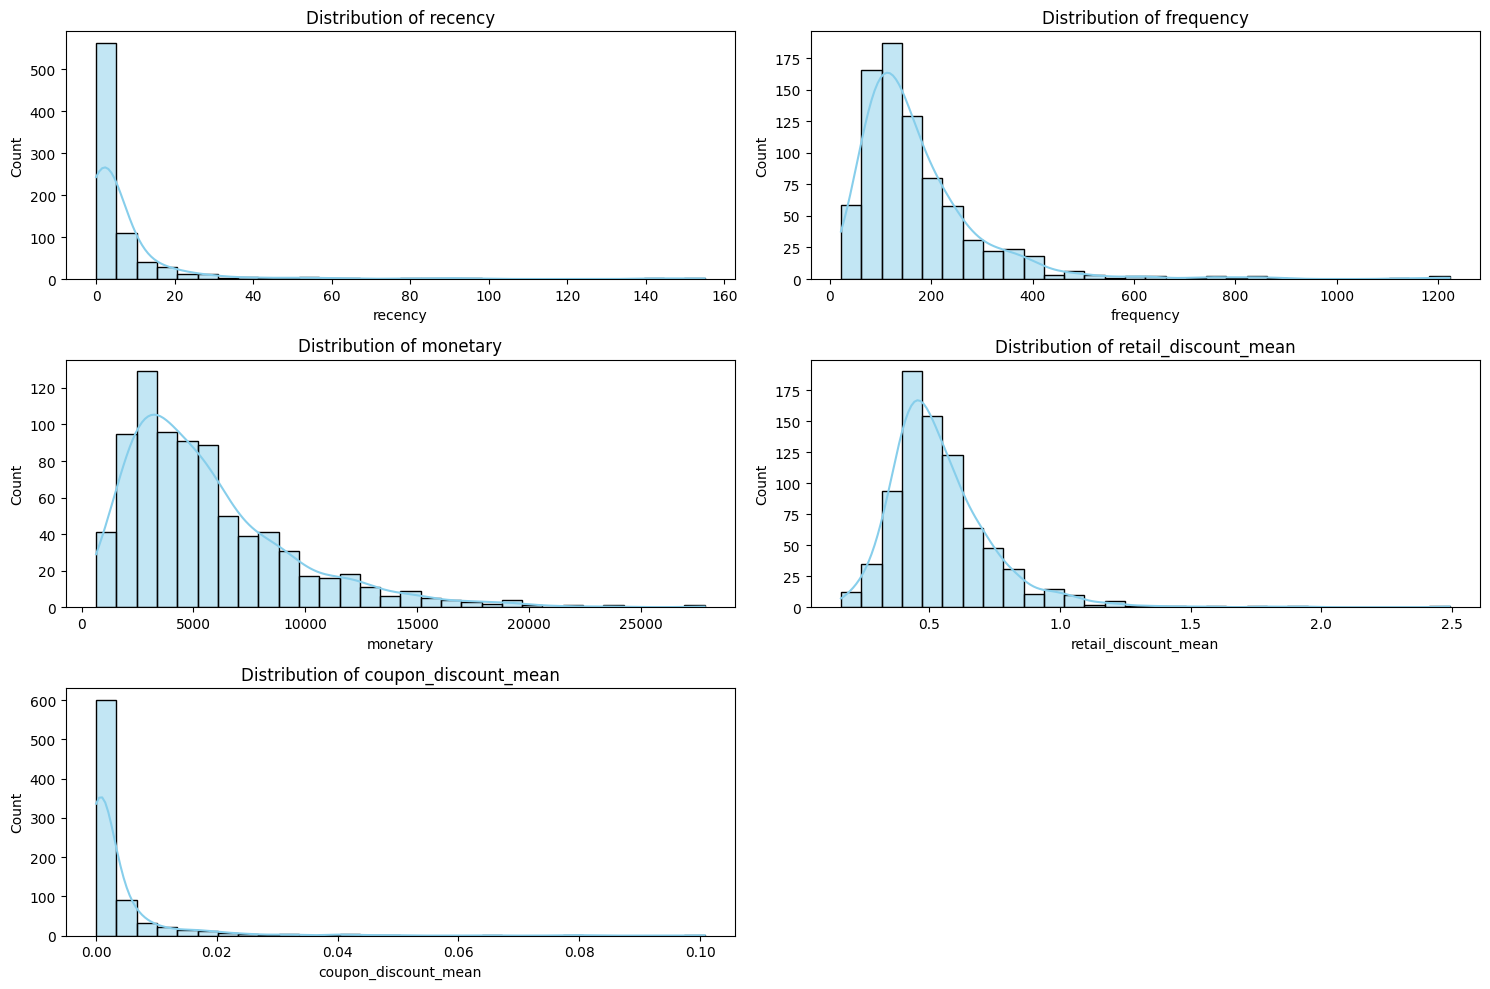

recency                 5.481019
frequency               3.281336
monetary                1.612528
retail_discount_mean    2.535496
coupon_discount_mean    5.733556
dtype: float64


In [252]:
# Select the numerical variable from household profile dataframe
numerical_variables = ['recency', 'frequency', 'monetary', 'retail_discount_mean', 'coupon_discount_mean']

# Loop over numerical variables to plot their distribution
plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_variables, 1):
    plt.subplot(3, 2, i)
    sns.histplot(household_profile_df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Calculate and print the skewness of the numerical variables
skewness = household_profile_df[numerical_variables].skew()
print(skewness)

# Check The Outliers of Numerical Variables (Excluding Compositional Variables)

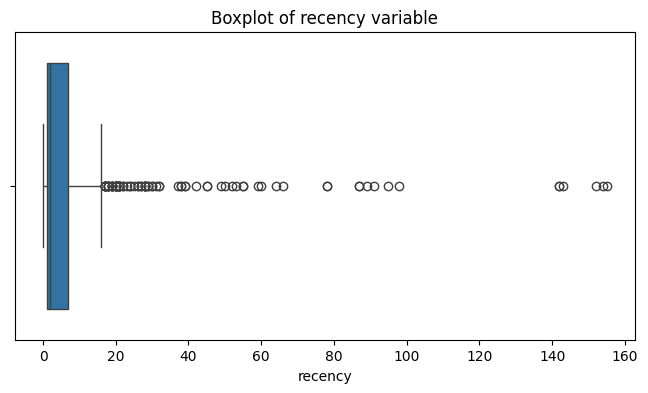

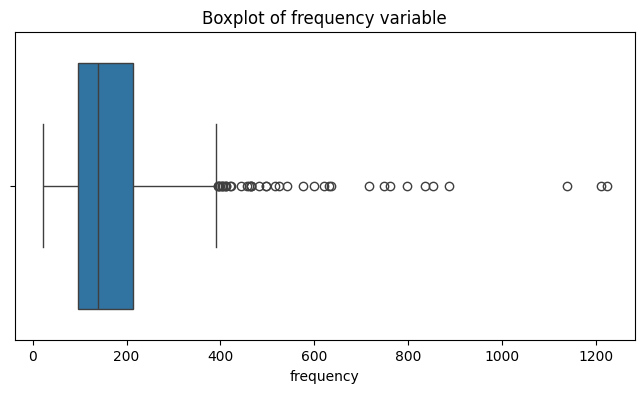

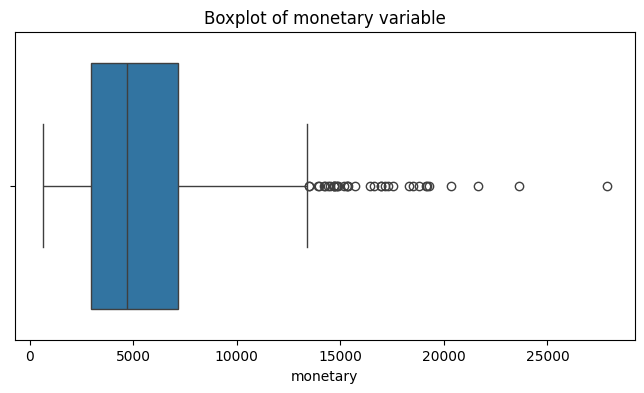

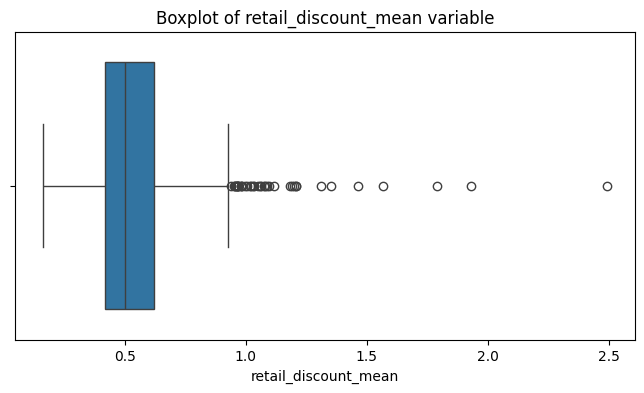

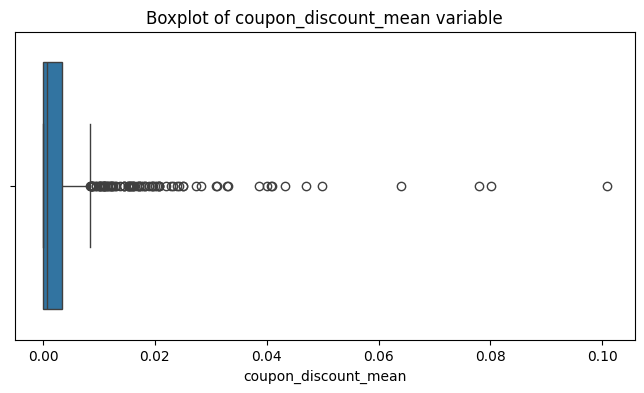

In [253]:
# Display a boxplot for each numerical variables
for col in numerical_variables:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=household_profile_df[col])
    plt.title(f'Boxplot of {col} variable')
    plt.show()

In [254]:
# Detect outliers using the IQR method with a multiplier of 1.5
outliers = {}
for col in numerical_variables:
    Q1 = household_profile_df[col].quantile(0.25)
    Q3 = household_profile_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[col] = household_profile_df[(household_profile_df[col] < lower_bound) | (household_profile_df[col] > upper_bound)][col]

# Print number of outliers for 'recency', 'frequency', 'monetary', 'retail_discount_mean' and 'coupon_discount_mean' variables
for col, vals in outliers.items():
    print(f"{col}: {len(vals)} outliers")

recency: 85 outliers
frequency: 39 outliers
monetary: 36 outliers
retail_discount_mean: 39 outliers
coupon_discount_mean: 89 outliers


In [255]:
# Detect outliers using the IQR method with a multiplier of 6
outliers = {}
for col in numerical_variables:
    Q1 = household_profile_df[col].quantile(0.25)
    Q3 = household_profile_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 6 * IQR
    upper_bound = Q3 + 6 * IQR
    outliers[col] = household_profile_df[(household_profile_df[col] < lower_bound) | (household_profile_df[col] > upper_bound)][col]

# Print number of outliers for 'recency', 'frequency', 'monetary', 'retail_discount_mean' and 'coupon_discount_mean' variables
for col, vals in outliers.items():
    print(f"{col}: {len(vals)} outliers")

recency: 26 outliers
frequency: 3 outliers
monetary: 0 outliers
retail_discount_mean: 2 outliers
coupon_discount_mean: 21 outliers


In [256]:
# Further show rows with outliers in 'recency', 'frequency', 'monetary', 'retail_discount_mean' and 'coupon_discount_mean' variables
# using the IQR method with a multiplier of 6.
outlier_rows_household = {}
for col in numerical_variables:
    Q1 = household_profile_df[col].quantile(0.25)
    Q3 = household_profile_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 6 * IQR
    upper_bound = Q3 + 6 * IQR
    outlier_rows_household[col] = household_profile_df[(household_profile_df[col] < lower_bound) | (household_profile_df[col] > upper_bound)]

# Print the rows with outliers for 'recency', 'frequency', 'monetary', 'retail_discount_mean' and 'coupon_discount_mean' variables
for col, outlier_dataframe in outlier_rows_household.items():
    if col in ['recency', 'frequency', 'monetary', 'retail_discount_mean', 'coupon_discount_mean']:
        print(f"\nRows with outliers for {col} variable:")
        display(outlier_dataframe)


Rows with outliers for recency variable:


,household_key,age_encoded,income_encoded,household_size_encoded,kid_category_encoded,recency,frequency,monetary,retail_discount_mean,retail_discount_usage_proportion,retail_discount_no_usage_proportion,coupon_discount_mean,coupon_discount_usage_proportion,coupon_discount_no_usage_proportion,did_not_receive_campaign_and_no_coupons_proportion,received_campaign_and_16_coupons_proportion,received_campaign_and_all_coupons_proportion,afternoon_proportion,evening_proportion,midnight_proportion,morning_proportion,night_proportion,displayed_proportion,missing_display_info_proportion,not_displayed_proportion,missing_advertisment_info_proportion,not_on_advertisement_proportion,on_advertisement_proportion,national_proportion,private_proportion,alcohol_proportion,deli & bakery_proportion,entertainment & leisure_proportion,general_grocery_proportion,health_personal_care_proportion,home & lifestyle_proportion,meat_proportion,miscellaneous & services_proportion,produce_proportion,seafood_proportion
27,74,5,1,1,0,55,131,2047.64,0.827589,0.157265,-0.157265,0.000718,-2.319786,2.319786,1.261919,-0.164771,-1.097148,6.408613,3.390514,-7.210892,4.622657,-7.210892,-0.551021,0.938891,-0.387870,1.240381,-1.648565,0.408185,0.196759,-0.196759,-7.633968,3.506433,-7.633968,5.732557,3.560500,-7.633968,3.520227,1.794716,4.171410,0.616061
53,149,3,3,1,0,60,215,11920.93,0.408462,-0.160348,0.160348,0.000000,-4.016505,4.016505,1.232109,0.863512,-2.095621,3.568715,1.431173,-9.292645,3.932024,0.360732,-0.869126,1.640397,-0.771271,1.734509,-1.413602,-0.320907,0.788160,-0.788160,-7.760309,3.401762,-7.760309,5.503983,3.907968,-7.760309,3.437965,2.499201,4.023279,0.506771
106,309,1,5,1,0,87,22,2325.59,0.674006,0.033394,-0.033394,0.002177,-2.459260,2.459260,6.242249,1.323729,-7.565977,5.324381,5.431195,-7.572658,4.389741,-7.572658,-0.911215,1.416965,-0.505750,1.526391,-1.389577,-0.136814,1.367338,-1.367338,-7.115957,2.110220,-7.115957,6.541037,3.054681,-7.115957,3.801896,0.164310,3.565507,2.110220
125,370,5,4,1,0,155,133,3386.78,0.450958,-0.052399,0.052399,0.001375,-2.470375,2.470375,6.249712,1.308962,-7.558674,5.768280,3.657248,-7.435011,5.444493,-7.435011,-0.573331,1.318512,-0.745181,1.383701,-1.149996,-0.233705,0.328053,-0.328053,-8.457214,3.387226,-8.457214,4.787749,2.648468,-1.669020,2.895328,1.764967,3.159293,-0.059582
136,391,5,2,0,0,98,49,1412.64,0.461891,-0.054427,0.054427,0.001655,-2.470821,2.470821,2.064096,-1.581354,-0.482742,1.155538,1.337860,-0.453900,-3.018849,0.979351,-0.438183,1.265023,-0.826841,1.286913,-0.967470,-0.319443,0.743418,-0.743418,-7.341741,2.824289,-7.341741,6.175787,4.503931,-7.341741,3.370833,0.426394,3.198983,1.525006
172,492,3,4,1,0,78,117,7148.28,0.691037,0.214413,-0.214413,0.006654,-1.614476,1.614476,0.547383,0.077380,-0.624763,3.387610,3.071656,-9.534724,2.997921,0.077538,-0.858356,1.279831,-0.421475,1.375132,-1.280998,-0.094135,0.421584,-0.421584,-0.996448,-0.590983,-8.561017,4.964557,3.050980,-1.689595,2.117067,1.529281,2.558900,-2.382742
184,546,3,4,1,0,78,122,3339.00,0.959699,0.045222,-0.045222,0.000290,-2.223087,2.223087,4.787702,3.896423,-8.684125,1.314594,1.093382,-0.908741,-1.427535,-0.071700,-0.160004,0.851140,-0.691135,0.874380,-0.814949,-0.059431,-0.108184,0.108184,-7.499947,3.081506,-7.499947,5.893740,3.598197,-7.499947,4.545578,2.774022,3.051653,-0.444854
225,682,5,7,1,0,142,217,4438.29,0.752787,0.185879,-0.185879,0.004518,-1.753805,1.753805,5.755346,2.274500,-8.029846,4.431022,2.633285,-8.941974,3.485709,-1.608042,-0.751899,1.053018,-0.301119,1.234923,-1.428392,0.193469,0.076720,-0.076720,-1.515307,1.896941,-9.254704,4.022028,1.929376,-2.613919,2.348926,1.298104,2.423034,-0.534477
348,1031,2,5,1,0,154,146,4232.12,0.296972,-0.229221,0.229221,0.000000,-3.164415,3.164415,5.155010,3.352823,-8.507832,3.298018,3.451501,-9.552856,2.386389,0.416948,-0.506360,1.479555,-0.973195,1.467389,-0.866172,-0.601218,0.363365,-0.363365,-8.295733,3.039311,-8.295733,4.963715,3.577421,-1.503983,2.623151,2.079536,3.316298,-1.503983
366,1091,


Rows with outliers for frequency variable:


,household_key,age_encoded,income_encoded,household_size_encoded,kid_category_encoded,recency,frequency,monetary,retail_discount_mean,retail_discount_usage_proportion,retail_discount_no_usage_proportion,coupon_discount_mean,coupon_discount_usage_proportion,coupon_discount_no_usage_proportion,did_not_receive_campaign_and_no_coupons_proportion,received_campaign_and_16_coupons_proportion,received_campaign_and_all_coupons_proportion,afternoon_proportion,evening_proportion,midnight_proportion,morning_proportion,night_proportion,displayed_proportion,missing_display_info_proportion,not_displayed_proportion,missing_advertisment_info_proportion,not_on_advertisement_proportion,on_advertisement_proportion,national_proportion,private_proportion,alcohol_proportion,deli & bakery_proportion,entertainment & leisure_proportion,general_grocery_proportion,health_personal_care_proportion,home & lifestyle_proportion,meat_proportion,miscellaneous & services_proportion,produce_proportion,seafood_proportion
304,900,2,3,1,0,0,1223,16450.53,0.360311,0.104794,-0.104794,0.000000,-3.116224,3.116224,0.754706,-0.341087,-0.413619,2.014081,1.158714,-3.870634,1.008373,-0.310535,-0.820440,1.651101,-0.830661,1.690070,-1.190331,-0.499739,0.324129,-0.324129,-8.669142,3.084418,-8.669142,4.567948,3.335304,0.199810,2.217009,1.611638,2.193806,0.128351
562,1795,3,2,1,0,1,1138,9751.73,0.593832,0.489684,-0.489684,0.005762,-1.699611,1.699611,0.427127,-0.157605,-0.269523,0.178981,0.474553,-0.395659,-0.221372,-0.036504,-0.871292,1.035018,-0.163726,1.189339,-1.397747,0.208407,0.877758,-0.877758,-8.343930,2.357957,-8.343930,5.034906,3.898060,-0.276327,1.928277,1.372331,2.466661,-0.094006
751,2337,5,0,2,2,2,1210,11703.97,0.329291,-0.241876,0.241876,0.000290,-2.920048,2.920048,1.031347,-0.313689,-0.717658,2.884214,2.955954,-9.834313,2.477935,1.516210,-0.598941,1.332096,-0.733154,1.366954,-1.016750,-0.350204,0.592919,-0.592919,-8.196353,1.434382,-8.196353,5.167222,3.642133,-1.204675,3.074303,1.252061,3.458764,-0.431485



Rows with outliers for monetary variable:


,household_key,age_encoded,income_encoded,household_size_encoded,kid_category_encoded,recency,frequency,monetary,retail_discount_mean,retail_discount_usage_proportion,retail_discount_no_usage_proportion,coupon_discount_mean,coupon_discount_usage_proportion,coupon_discount_no_usage_proportion,did_not_receive_campaign_and_no_coupons_proportion,received_campaign_and_16_coupons_proportion,received_campaign_and_all_coupons_proportion,afternoon_proportion,evening_proportion,midnight_proportion,morning_proportion,night_proportion,displayed_proportion,missing_display_info_proportion,not_displayed_proportion,missing_advertisment_info_proportion,not_on_advertisement_proportion,on_advertisement_proportion,national_proportion,private_proportion,alcohol_proportion,deli & bakery_proportion,entertainment & leisure_proportion,general_grocery_proportion,health_personal_care_proportion,home & lifestyle_proportion,meat_proportion,miscellaneous & services_proportion,produce_proportion,seafood_proportion



Rows with outliers for retail_discount_mean variable:


,household_key,age_encoded,income_encoded,household_size_encoded,kid_category_encoded,recency,frequency,monetary,retail_discount_mean,retail_discount_usage_proportion,retail_discount_no_usage_proportion,coupon_discount_mean,coupon_discount_usage_proportion,coupon_discount_no_usage_proportion,did_not_receive_campaign_and_no_coupons_proportion,received_campaign_and_16_coupons_proportion,received_campaign_and_all_coupons_proportion,afternoon_proportion,evening_proportion,midnight_proportion,morning_proportion,night_proportion,displayed_proportion,missing_display_info_proportion,not_displayed_proportion,missing_advertisment_info_proportion,not_on_advertisement_proportion,on_advertisement_proportion,national_proportion,private_proportion,alcohol_proportion,deli & bakery_proportion,entertainment & leisure_proportion,general_grocery_proportion,health_personal_care_proportion,home & lifestyle_proportion,meat_proportion,miscellaneous & services_proportion,produce_proportion,seafood_proportion
438,1357,4,2,1,0,1,87,3061.90,1.932495,0.064924,-0.064924,0.011690,-1.385252,1.385252,0.929088,0.270699,-1.199787,6.070031,2.754194,-7.226762,5.629298,-7.226762,-1.015213,0.81403,0.201183,1.266662,-2.131197,0.864535,-0.225763,0.225763,-7.224762,2.304208,-7.224762,6.362185,4.435835,0.358298,2.997355,3.248669,1.967736,-7.224762
672,2111,3,5,1,0,24,123,2590.37,2.492000,0.674277,-0.674277,0.100779,-0.598355,0.598355,0.693029,0.504038,-1.197067,3.543362,2.129331,-9.583570,3.167840,0.743037,-1.234298,0.79329,0.441007,1.297273,-2.383238,1.085964,0.536161,-0.536161,-7.571026,3.017943,-7.571026,5.785712,4.496045,-0.240154,2.895341,3.127142,3.631048,-7.571026



Rows with outliers for coupon_discount_mean variable:


,household_key,age_encoded,income_encoded,household_size_encoded,kid_category_encoded,recency,frequency,monetary,retail_discount_mean,retail_discount_usage_proportion,retail_discount_no_usage_proportion,coupon_discount_mean,coupon_discount_usage_proportion,coupon_discount_no_usage_proportion,did_not_receive_campaign_and_no_coupons_proportion,received_campaign_and_16_coupons_proportion,received_campaign_and_all_coupons_proportion,afternoon_proportion,evening_proportion,midnight_proportion,morning_proportion,night_proportion,displayed_proportion,missing_display_info_proportion,not_displayed_proportion,missing_advertisment_info_proportion,not_on_advertisement_proportion,on_advertisement_proportion,national_proportion,private_proportion,alcohol_proportion,deli & bakery_proportion,entertainment & leisure_proportion,general_grocery_proportion,health_personal_care_proportion,home & lifestyle_proportion,meat_proportion,miscellaneous & services_proportion,produce_proportion,seafood_proportion
3,13,1,5,3,2,2,275,13190.92,0.693011,0.036643,-0.036643,0.033113,-0.960418,0.960418,0.402524,0.014948,-0.417472,1.232640,1.663564,-3.136808,0.647382,-0.406778,-0.451950,1.298350,-0.846400,1.307233,-0.910542,-0.396691,0.417983,-0.417983,-8.305458,1.332251,-8.305458,5.066608,3.833231,-0.641830,2.203079,2.792157,2.484930,-0.459509
12,31,2,3,1,0,1,69,4396.90,0.874935,0.368924,-0.368924,0.077939,-0.526160,0.526160,0.626001,-0.277196,-0.348805,5.313777,5.238625,-7.606475,4.660547,-7.606475,-0.885551,1.200122,-0.314571,1.343108,-1.415909,0.072801,0.638344,-0.638344,-7.524537,3.381942,-7.524537,5.897449,3.939134,-0.695595,3.196225,2.915322,3.939134,-7.524537
47,127,3,2,0,0,0,191,4658.23,0.890150,0.229812,-0.229812,0.024286,-1.359127,1.359127,0.619885,-0.045229,-0.574656,3.996854,3.110877,-9.283733,2.740018,-0.564016,-0.552736,0.946806,-0.394071,1.054220,-1.116097,0.061877,0.332860,-0.332860,-8.362104,2.010535,-1.839613,4.973832,3.094861,-0.047853,3.073042,2.111631,3.347773,-8.362104
56,158,3,4,0,0,7,180,1869.79,0.709296,0.429531,-0.429531,0.049824,-0.627514,0.627514,1.446316,1.108623,-2.554939,8.795779,-4.956128,-4.956128,6.072606,-4.956128,-0.971920,0.700978,0.270942,1.067011,-1.893742,0.826731,0.476781,-0.476781,-7.603788,2.267493,-7.603788,5.647250,3.533160,-0.130402,4.288439,2.814037,4.391387,-7.603788
69,208,3,4,1,0,10,140,4296.33,0.820157,0.004292,-0.004292,0.040029,-1.002203,1.002203,0.811101,0.486693,-1.297794,3.554596,2.775559,-9.204325,3.896345,-1.022175,-0.723774,1.223081,-0.499307,1.325665,-1.244022,-0.081643,0.927901,-0.927901,-6.830345,3.731347,-6.830345,6.545869,4.253223,-6.830345,4.836114,3.143561,4.811268,-6.830345
124,367,4,4,1,0,3,114,7186.37,0.891030,0.252373,-0.252373,0.031046,-1.017439,1.017439,0.439194,0.414074,-0.853268,5.176966,3.441270,-8.429089,2.299173,-2.488319,-0.899880,0.915241,-0.015361,1.212562,-1.741993,0.529430,0.566179,-0.566179,-8.249327,2.373574,-8.249327,5.171307,3.286154,-2.308558,2.048151,1.716794,3.475268,0.735965
152,437,1,4,4,3,3,90,5915.73,0.544232,-0.016563,0.016563,0.024986,-1.155390,1.155390,0.723580,0.132572,-0.856153,4.085901,4.525372,-8.716865,2.474889,-2.369298,-0.787404,1.620617,-0.833213,1.672925,-1.238486,-0.434438,0.589327,-0.589327,-7.761093,2.890538,-7.761093,5.404303,4.741331,-7.761093,3.430660,2.415114,3.249912,1.151422
163,464,5,4,1,0,2,173,3590.49,0.818380,0.359908,-0.359908,0.040960,-0.935508,0.935508,0.177593,0.375419,-0.553012,5.246181,4.372566,-7.566706,5.514664,-7.566706,-0.662308,0.957283,-0.294975,1.177733,-1.471477,0.293743,0.209265,-0.209265,-7.339907,2.967453,-7.339907,6.191768,3.602104,-0.816737,3.798384,2.402139,3.874611,-7.339907
170,490,2,5,4,3,19,80,3886.87,0.997907,0.251695,-0.251695,0.063992,-0.796393,0.796393,4.452311,4.293840,-8.746151,1.159170,0.946712,-1.783317,0.508094,-0.830659,-0.226282,0.752839,-0.526557,0.909458,-1.185488,0.276030,1.152573,-1.152573,-7.184960,1.953057,-7.184960,6.350588,4.177681,-0.531849,4.255642,1.770736,3.579024,-7.184960
190,574,2,5,2,1,0,120,6753.

Based on the results above, it can be observed that:
- recency, frequency, retail_discount_mean and coupon_discount_mean are highly right-skewed.
- monetary is moderately right-skewed.
- recency, frequency, monetary, retail_discount_mean and coupon_discount_mean have outliers using the IQR method with a multiplier of 3.

<br>

These observed right-skewness can be explained as follows:
- recency:  a few households have not made a purchase for a long time.
- frequency: a few households make purchases very frequently.
- monetary: a few households spend a lot on purchases.
- retail and coupon discount: a few customers are discount-sensitive and make purchases using large discounts.


# Apply Log Transformation Or Yeo-Johnson Transformation To Numerical Variables

In [ ]:
# Display first 5 rows of the dataset
household_profile_df.head()

In [257]:
# Loop through each variable and print summary statistics
for numerical_variable in numerical_variables:
    print(f"Summary statistics for {numerical_variable}:")
    print(household_profile_df[numerical_variable].describe())
    print()

Summary statistics for recency:
count    801.000000
mean       7.449438
std       17.288587
min        0.000000
25%        1.000000
50%        2.000000
75%        7.000000
max      155.000000
Name: recency, dtype: float64

Summary statistics for frequency:
count     801.000000
mean      175.204744
std       130.901673
min        22.000000
25%        96.000000
50%       139.000000
75%       214.000000
max      1223.000000
Name: frequency, dtype: float64

Summary statistics for monetary:
count      801.000000
mean      5615.126417
std       3750.938675
min        646.400000
25%       2970.100000
50%       4676.430000
75%       7164.990000
max      27859.680000
Name: monetary, dtype: float64

Summary statistics for retail_discount_mean:
count    801.000000
mean       0.545616
std        0.209022
min        0.161131
25%        0.417901
50%        0.500012
75%        0.621807
max        2.492000
Name: retail_discount_mean, dtype: float64

Summary statistics for coupon_discount_mean:
count  

In [258]:
# Create a copy for log transformation
household_profile_log_df = household_profile_df.copy()

# Add a small constant and apply log transformation
household_profile_log_df[numerical_variables] = np.log1p(household_profile_log_df[numerical_variables])

# Display first 5 rows of the transformed dataset
household_profile_log_df.head()

,household_key,age_encoded,income_encoded,household_size_encoded,kid_category_encoded,recency,frequency,monetary,retail_discount_mean,retail_discount_usage_proportion,retail_discount_no_usage_proportion,coupon_discount_mean,coupon_discount_usage_proportion,coupon_discount_no_usage_proportion,did_not_receive_campaign_and_no_coupons_proportion,received_campaign_and_16_coupons_proportion,received_campaign_and_all_coupons_proportion,afternoon_proportion,evening_proportion,midnight_proportion,morning_proportion,night_proportion,displayed_proportion,missing_display_info_proportion,not_displayed_proportion,missing_advertisment_info_proportion,not_on_advertisement_proportion,on_advertisement_proportion,national_proportion,private_proportion,alcohol_proportion,deli & bakery_proportion,entertainment & leisure_proportion,general_grocery_proportion,health_personal_care_proportion,home & lifestyle_proportion,meat_proportion,miscellaneous & services_proportion,produce_proportion,seafood_proportion
0,1,5,3,1,0,1.791759,4.465908,8.373591,0.339050,-0.121615,0.121615,0.015028,-1.363680,1.363680,0.620271,-0.030580,-0.589691,5.841657,4.048005,-7.483846,5.078030,-7.483846,-0.633739,1.529236,-0.895497,1.568759,-1.156866,-0.411894,1.007944,-1.007944,-7.403495,3.702803,-7.403495,5.994899,4.204895,-1.042129,3.676370,1.665921,4.007727,-7.403495
1,7,3,4,1,0,1.098612,4.094345,8.131839,0.318601,-0.112447,0.112447,0.003997,-1.921118,1.921118,1.177101,-0.625152,-0.551949,3.825838,3.332578,-9.375729,-0.080454,2.297768,-1.497176,1.932442,-0.435266,1.998426,-1.709906,-0.288520,0.200142,-0.200142,-7.981876,2.387912,-7.981876,5.395766,4.085986,-1.325660,2.817475,0.466100,3.461832,-1.325660
2,8,1,2,2,1,1.791759,4.736198,8.619022,0.434941,0.019709,-0.019709,0.000934,-2.200046,2.200046,0.550434,-0.063555,-0.486878,2.617577,3.053119,-9.869078,2.357500,1.840882,-0.673501,1.244348,-0.570847,1.345186,-1.239142,-0.106044,0.590237,-0.590237,-1.355270,1.325752,-9.189871,4.257858,2.313407,-0.399759,1.947947,-0.131495,2.116696,-0.885266
3,13,1,5,3,2,1.098612,5.620401,9.487360,0.526509,0.036643,-0.036643,0.032577,-0.960418,0.960418,0.402524,0.014948,-0.417472,1.232640,1.663564,-3.136808,0.647382,-0.406778,-0.451950,1.298350,-0.846400,1.307233,-0.910542,-0.396691,0.417983,-0.417983,-8.305458,1.332251,-8.305458,5.066608,3.833231,-0.641830,2.203079,2.792157,2.484930,-0.459509
4,16,3,4,0,0,3.091042,4.595120,7.321863,0.286167,-0.317830,0.317830,0.000000,-3.123053,3.123053,1.607420,-1.069024,-0.538396,5.523018,4.404284,-7.569901,5.212500,-7.569901,0.903198,6.454218,-7.357416,6.454218,0.903198,-7.357416,0.654166,-0.654166,-6.818094,4.719661,-6.818094,6.584180,4.360287,-6.818094,4.245877,2.828811,4.533559,-6.818094


In [259]:
# Detect outliers using the IQR method with a multiplier of 1.5 after log transformation
outliers = {}
for col in numerical_variables:
    Q1 = household_profile_log_df[col].quantile(0.25)
    Q3 = household_profile_log_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[col] = household_profile_log_df[(household_profile_log_df[col] < lower_bound) | (household_profile_log_df[col] > upper_bound)][col]

# Print number of outliers for 'recency', 'frequency', 'monetary', 'retail_discount_mean' and 'coupon_discount_mean' variables
for col, vals in outliers.items():
    print(f"{col}: {len(vals)} outliers")

recency: 16 outliers
frequency: 12 outliers
monetary: 4 outliers
retail_discount_mean: 26 outliers
coupon_discount_mean: 89 outliers


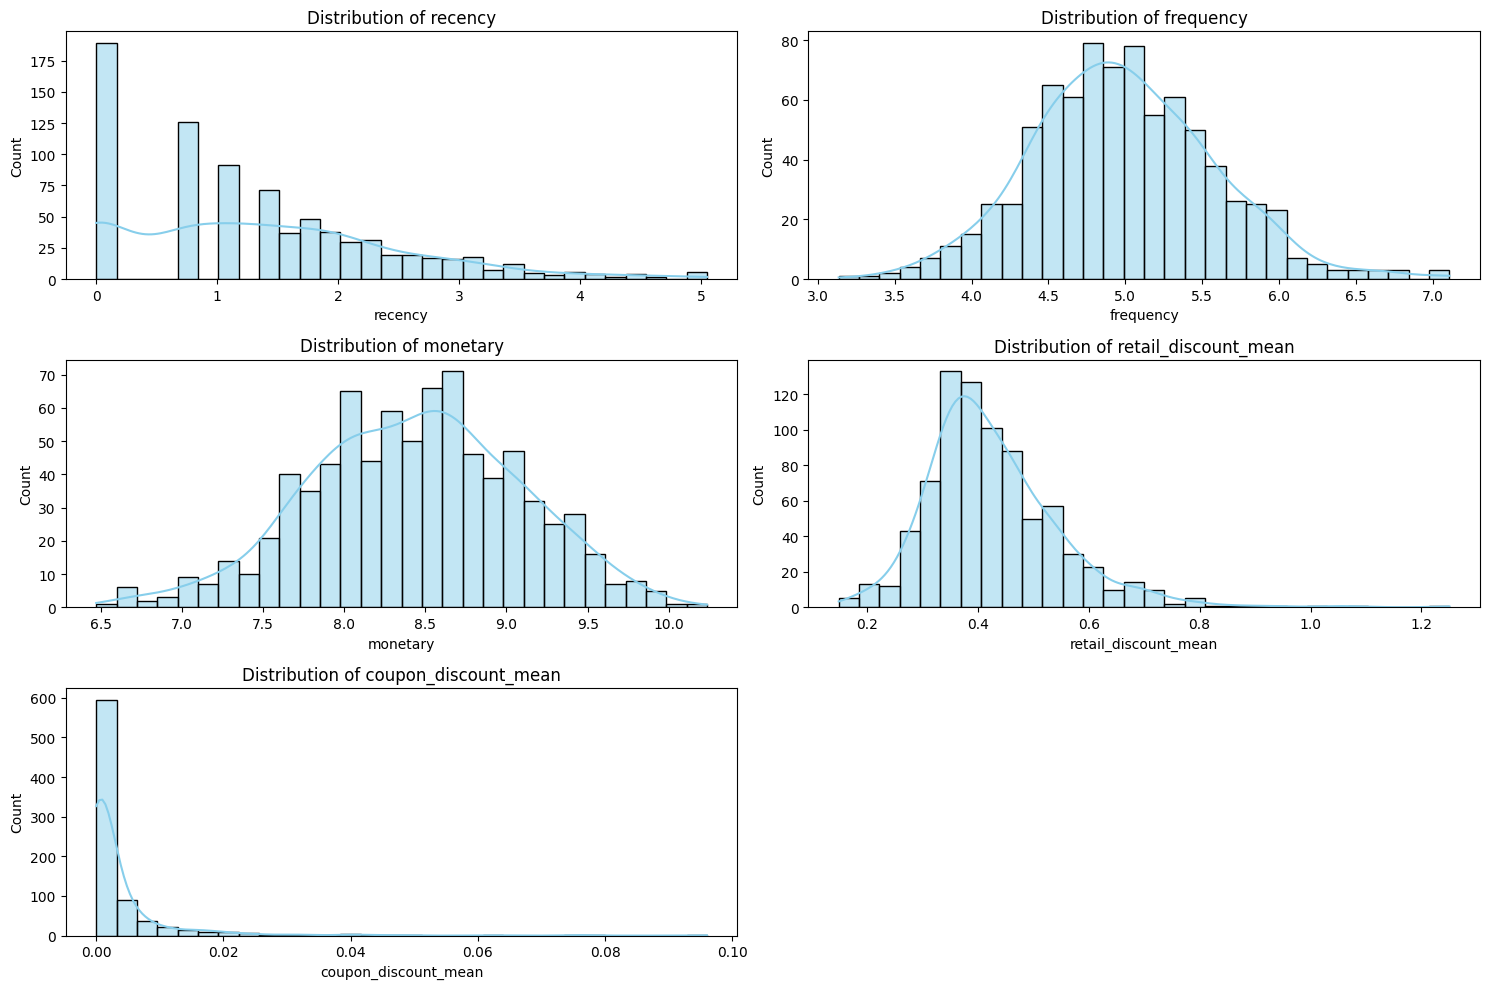

recency                 0.717690
frequency               0.286786
monetary               -0.119554
retail_discount_mean    1.379211
coupon_discount_mean    5.559623
dtype: float64


In [260]:
# Loop over numerical variables to plot their distribution after log transformation
plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_variables, 1):
    plt.subplot(3, 2, i)
    sns.histplot(household_profile_log_df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Calculate and print the skewness of the numerical variables
skewness = household_profile_log_df[numerical_variables].skew()
print(skewness)

In [261]:
# Yeo-Johnson transformation will be applied to numerical variables because
# 'recency' and 'coupon_discount_mean' contains zeros.

# Initialize Yeo-Johnson transformer
yeo_johnson_transformation = PowerTransformer(method='yeo-johnson', standardize=False)

# Fit and transform the numerical variables
household_profile_df[numerical_variables] = yeo_johnson_transformation.fit_transform(household_profile_df[numerical_variables])

# Save the fitted Yeo-Johnson transformation
save_dir = '/content/drive/MyDrive/0. Colab Notebooks (DATA 60X Project)/2. Preprocessed Datasets/'
os.makedirs(save_dir, exist_ok=True)
joblib.dump(yeo_johnson_transformation, f'{save_dir}/yeo_johnson_transformation.pkl')

# Display first 5 rows of the dataset
household_profile_df.head()

,household_key,age_encoded,income_encoded,household_size_encoded,kid_category_encoded,recency,frequency,monetary,retail_discount_mean,retail_discount_usage_proportion,retail_discount_no_usage_proportion,coupon_discount_mean,coupon_discount_usage_proportion,coupon_discount_no_usage_proportion,did_not_receive_campaign_and_no_coupons_proportion,received_campaign_and_16_coupons_proportion,received_campaign_and_all_coupons_proportion,afternoon_proportion,evening_proportion,midnight_proportion,morning_proportion,night_proportion,displayed_proportion,missing_display_info_proportion,not_displayed_proportion,missing_advertisment_info_proportion,not_on_advertisement_proportion,on_advertisement_proportion,national_proportion,private_proportion,alcohol_proportion,deli & bakery_proportion,entertainment & leisure_proportion,general_grocery_proportion,health_personal_care_proportion,home & lifestyle_proportion,meat_proportion,miscellaneous & services_proportion,produce_proportion,seafood_proportion
0,1,5,3,1,0,1.417809,3.293642,11.224266,0.229628,-0.121615,0.121615,0.004519,-1.363680,1.363680,0.620271,-0.030580,-0.589691,5.841657,4.048005,-7.483846,5.078030,-7.483846,-0.633739,1.529236,-0.895497,1.568759,-1.156866,-0.411894,1.007944,-1.007944,-7.403495,3.702803,-7.403495,5.994899,4.204895,-1.042129,3.676370,1.665921,4.007727,-7.403495
1,7,3,4,1,0,0.949495,3.093050,10.804470,0.220551,-0.112447,0.112447,0.002695,-1.921118,1.921118,1.177101,-0.625152,-0.551949,3.825838,3.332578,-9.375729,-0.080454,2.297768,-1.497176,1.932442,-0.435266,1.998426,-1.709906,-0.288520,0.200142,-0.200142,-7.981876,2.387912,-7.981876,5.395766,4.085986,-1.325660,2.817475,0.466100,3.461832,-1.325660
2,8,1,2,2,1,1.417809,3.432961,11.657452,0.266581,0.019709,-0.019709,0.000848,-2.200046,2.200046,0.550434,-0.063555,-0.486878,2.617577,3.053119,-9.869078,2.357500,1.840882,-0.673501,1.244348,-0.570847,1.345186,-1.239142,-0.106044,0.590237,-0.590237,-1.355270,1.325752,-9.189871,4.257858,2.313407,-0.399759,1.947947,-0.131495,2.116696,-0.885266
3,13,1,5,3,2,0.949495,3.852607,13.248418,0.294569,0.036643,-0.036643,0.004709,-0.960418,0.960418,0.402524,0.014948,-0.417472,1.232640,1.663564,-3.136808,0.647382,-0.406778,-0.451950,1.298350,-0.846400,1.307233,-0.910542,-0.396691,0.417983,-0.417983,-8.305458,1.332251,-8.305458,5.066608,3.833231,-0.641830,2.203079,2.792157,2.484930,-0.459509
4,16,3,4,0,0,2.089554,3.360920,9.446411,0.205179,-0.317830,0.317830,-0.000000,-3.123053,3.123053,1.607420,-1.069024,-0.538396,5.523018,4.404284,-7.569901,5.212500,-7.569901,0.903198,6.454218,-7.357416,6.454218,0.903198,-7.357416,0.654166,-0.654166,-6.818094,4.719661,-6.818094,6.584180,4.360287,-6.818094,4.245877,2.828811,4.533559,-6.818094


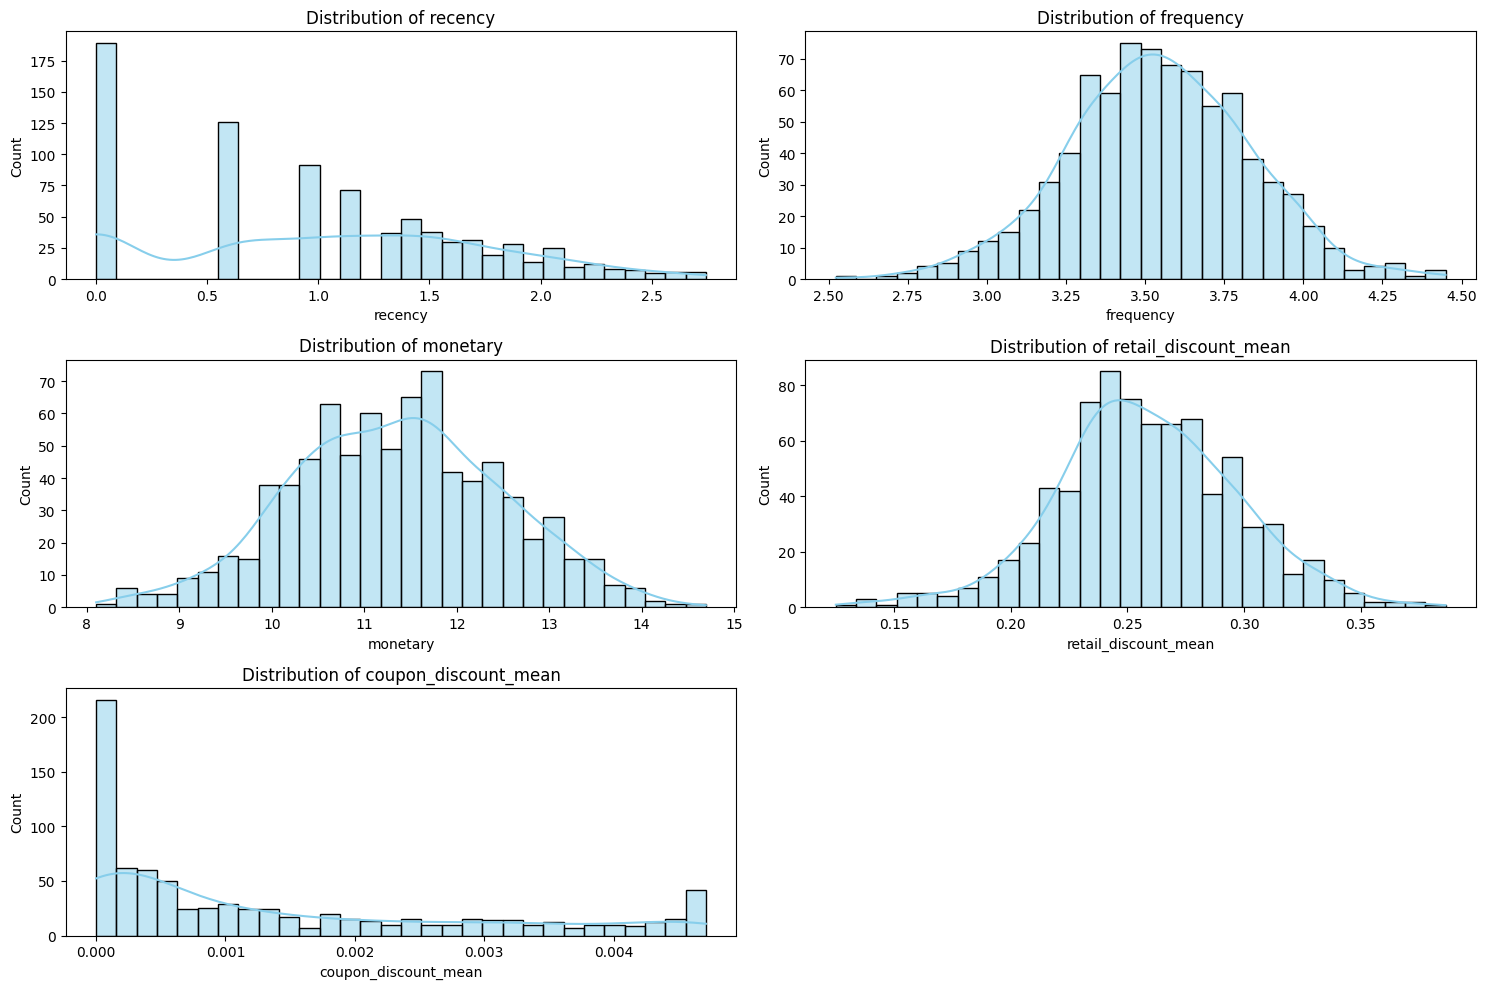

recency                 0.088927
frequency              -0.007193
monetary               -0.003235
retail_discount_mean   -0.034913
coupon_discount_mean    0.941680
dtype: float64


In [262]:
# Loop over numerical variables to plot their distribution after Yeo-Johnson transformation
plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_variables, 1):
    plt.subplot(3, 2, i)
    sns.histplot(household_profile_df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Calculate and print the skewness of the numerical variables
skewness = household_profile_df[numerical_variables].skew()
print(skewness)

In [263]:
# Detect outliers using the IQR method with a multiplier of 1.5 after Yeo-Johnson transformation
outliers = {}
for col in numerical_variables:
    Q1 = household_profile_df[col].quantile(0.25)
    Q3 = household_profile_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[col] = household_profile_df[(household_profile_df[col] < lower_bound) | (household_profile_df[col] > upper_bound)][col]

# Print number of outliers for 'recency', 'frequency', 'monetary', 'retail_discount_mean' and 'coupon_discount_mean' variables
for col, vals in outliers.items():
    print(f"{col}: {len(vals)} outliers")

recency: 0 outliers
frequency: 8 outliers
monetary: 2 outliers
retail_discount_mean: 16 outliers
coupon_discount_mean: 0 outliers


Yeo-Johnson transformation will be applied to numerical variables ('recency', 'frequency', 'monetary', 'retail_discount_mean' and 'coupon_discount_mean') because 'recency' and 'coupon_discount_mean' variables contain zeros. Additionally, Yeo-Johnson transformation reduces skewness and handles outliers more effectively than log transformation for these numerical variables.

# Perform Scaling Using RobustScaler

In [264]:
# Display first 5 rows of the dataset
household_profile_df.head()

,household_key,age_encoded,income_encoded,household_size_encoded,kid_category_encoded,recency,frequency,monetary,retail_discount_mean,retail_discount_usage_proportion,retail_discount_no_usage_proportion,coupon_discount_mean,coupon_discount_usage_proportion,coupon_discount_no_usage_proportion,did_not_receive_campaign_and_no_coupons_proportion,received_campaign_and_16_coupons_proportion,received_campaign_and_all_coupons_proportion,afternoon_proportion,evening_proportion,midnight_proportion,morning_proportion,night_proportion,displayed_proportion,missing_display_info_proportion,not_displayed_proportion,missing_advertisment_info_proportion,not_on_advertisement_proportion,on_advertisement_proportion,national_proportion,private_proportion,alcohol_proportion,deli & bakery_proportion,entertainment & leisure_proportion,general_grocery_proportion,health_personal_care_proportion,home & lifestyle_proportion,meat_proportion,miscellaneous & services_proportion,produce_proportion,seafood_proportion
0,1,5,3,1,0,1.417809,3.293642,11.224266,0.229628,-0.121615,0.121615,0.004519,-1.363680,1.363680,0.620271,-0.030580,-0.589691,5.841657,4.048005,-7.483846,5.078030,-7.483846,-0.633739,1.529236,-0.895497,1.568759,-1.156866,-0.411894,1.007944,-1.007944,-7.403495,3.702803,-7.403495,5.994899,4.204895,-1.042129,3.676370,1.665921,4.007727,-7.403495
1,7,3,4,1,0,0.949495,3.093050,10.804470,0.220551,-0.112447,0.112447,0.002695,-1.921118,1.921118,1.177101,-0.625152,-0.551949,3.825838,3.332578,-9.375729,-0.080454,2.297768,-1.497176,1.932442,-0.435266,1.998426,-1.709906,-0.288520,0.200142,-0.200142,-7.981876,2.387912,-7.981876,5.395766,4.085986,-1.325660,2.817475,0.466100,3.461832,-1.325660
2,8,1,2,2,1,1.417809,3.432961,11.657452,0.266581,0.019709,-0.019709,0.000848,-2.200046,2.200046,0.550434,-0.063555,-0.486878,2.617577,3.053119,-9.869078,2.357500,1.840882,-0.673501,1.244348,-0.570847,1.345186,-1.239142,-0.106044,0.590237,-0.590237,-1.355270,1.325752,-9.189871,4.257858,2.313407,-0.399759,1.947947,-0.131495,2.116696,-0.885266
3,13,1,5,3,2,0.949495,3.852607,13.248418,0.294569,0.036643,-0.036643,0.004709,-0.960418,0.960418,0.402524,0.014948,-0.417472,1.232640,1.663564,-3.136808,0.647382,-0.406778,-0.451950,1.298350,-0.846400,1.307233,-0.910542,-0.396691,0.417983,-0.417983,-8.305458,1.332251,-8.305458,5.066608,3.833231,-0.641830,2.203079,2.792157,2.484930,-0.459509
4,16,3,4,0,0,2.089554,3.360920,9.446411,0.205179,-0.317830,0.317830,-0.000000,-3.123053,3.123053,1.607420,-1.069024,-0.538396,5.523018,4.404284,-7.569901,5.212500,-7.569901,0.903198,6.454218,-7.357416,6.454218,0.903198,-7.357416,0.654166,-0.654166,-6.818094,4.719661,-6.818094,6.584180,4.360287,-6.818094,4.245877,2.828811,4.533559,-6.818094


In [265]:
# Use RobustScaler because our dataset has many outliers and skewed distribution.
# Create a copy for scaling by RobustScaler
household_profile_robust_scaler_df = household_profile_df.copy()

# Drop household_key because it is just an identifier
variables_robust_scaler = household_profile_robust_scaler_df.drop(columns=['household_key'])

# Apply RobustScaler
robust_scaler = RobustScaler()
household_profile_robust_scaler_array = robust_scaler.fit_transform(variables_robust_scaler)

# Convert back to DataFrame with original column names
household_profile_robust_scaler_df = pd.DataFrame(household_profile_robust_scaler_array, columns=variables_robust_scaler.columns)

# Save the fitted RobustScaler
save_dir = '/content/drive/MyDrive/0. Colab Notebooks (DATA 60X Project)/2. Preprocessed Datasets/'
os.makedirs(save_dir, exist_ok=True)
joblib.dump(robust_scaler, f'{save_dir}/robust_scaler.pkl')

# Add household_key back to the dataframe
household_profile_robust_scaler_df['household_key'] = household_profile_df['household_key'].values

# Move household_key to the first column of the dataframe
household_profile_robust_scaler_df = household_profile_robust_scaler_df[
    ['household_key'] + variables_robust_scaler.columns.tolist()
]

# Display first 5 rows of the dataset
household_profile_robust_scaler_df.head()

,household_key,age_encoded,income_encoded,household_size_encoded,kid_category_encoded,recency,frequency,monetary,retail_discount_mean,retail_discount_usage_proportion,retail_discount_no_usage_proportion,coupon_discount_mean,coupon_discount_usage_proportion,coupon_discount_no_usage_proportion,did_not_receive_campaign_and_no_coupons_proportion,received_campaign_and_16_coupons_proportion,received_campaign_and_all_coupons_proportion,afternoon_proportion,evening_proportion,midnight_proportion,morning_proportion,night_proportion,displayed_proportion,missing_display_info_proportion,not_displayed_proportion,missing_advertisment_info_proportion,not_on_advertisement_proportion,on_advertisement_proportion,national_proportion,private_proportion,alcohol_proportion,deli & bakery_proportion,entertainment & leisure_proportion,general_grocery_proportion,health_personal_care_proportion,home & lifestyle_proportion,meat_proportion,miscellaneous & services_proportion,produce_proportion,seafood_proportion
0,1,2.0,-0.333333,0.0,0.0,0.489861,-0.621099,-0.087203,-0.549338,-0.459021,0.459021,1.583771,1.120307,-1.120307,-0.129775,-0.138096,0.078206,1.292766,0.634063,0.139677,1.560290,-3.865000,0.246488,0.393576,-0.913541,0.291299,0.212894,-0.603169,1.501936,-1.501936,0.041404,1.277385,0.053773,0.895717,0.950963,0.090203,0.724057,0.511598,0.932404,-3.621881
1,7,0.0,0.000000,0.0,0.0,0.000000,-1.136685,-0.358394,-0.737420,-0.420944,0.420944,0.823167,0.572751,-0.572751,0.008514,-0.613512,0.083732,0.365092,0.273008,-0.139884,-0.667486,1.044168,-2.080063,1.423309,0.636160,1.437844,-1.338296,-0.243626,-0.803241,0.803241,-0.068422,0.250714,-0.057319,0.367726,0.847179,0.043339,0.057966,-0.238082,0.445438,-0.495107
2,8,-2.0,-0.666667,0.5,1.0,0.489861,-0.263006,0.192638,0.216292,0.127897,-0.127897,0.053112,0.298768,-0.298768,-0.147119,-0.164463,0.093260,-0.190946,0.131973,-0.212785,0.385384,0.814867,0.139347,-0.333988,0.179627,-0.305296,-0.017878,0.288159,0.309949,-0.309949,1.189880,-0.578625,-0.289342,-0.635065,-0.699947,0.196379,-0.616372,-0.611474,-0.754490,-0.268544
3,13,-2.0,0.333333,1.0,2.0,0.000000,0.815617,1.220412,0.796188,0.198222,-0.198222,1.662848,1.516420,-1.516420,-0.183852,-0.101691,0.103422,-0.828289,-0.569294,0.782034,-0.353158,-0.313182,0.736321,-0.196075,-0.748220,-0.406573,0.903794,-0.558864,-0.181600,0.181600,-0.129866,-0.573550,-0.119470,0.077653,0.626571,0.156368,-0.418512,1.215299,-0.426007,-0.049511
4,16,0.0,0.000000,-0.5,0.0,1.192513,-0.448174,-1.235709,-1.055914,-1.273896,1.273896,-0.300252,-0.607878,0.607878,0.115384,-0.968430,0.085717,1.146129,0.813866,0.126961,1.618363,-3.908189,4.387796,12.971305,-22.672249,13.327921,5.991053,-20.844276,0.492382,-0.492382,0.152564,2.071352,0.166213,1.415026,1.086591,-0.864491,1.165722,1.238202,1.401472,-3.320718


# Saving as CSV file

In [266]:
# Save 'household_profile_robust_scaler_df' as CSV file
household_profile_robust_scaler_df.to_csv('/content/drive/MyDrive/0. Colab Notebooks (DATA 60X Project)/2. Preprocessed Datasets/customer_segmentation_after_preprocessing.csv', index=False)